# 필요한 라이브러리 호출

In [1]:
# tensorflow 경고 메세지 무시
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# cpu, gpu 선택을 위해 지원되는 디바이스 넘버 보기
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10096696645520241038,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7327468768
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4575759197800258926
 physical_device_desc: "device: 0, name: Tesla M60, pci bus id: 0000:00:1e.0, compute capability: 5.2"]

In [3]:
# clear_output()을 통해 print 했던 로그들을 지우고 새로 출력하게 함
from IPython.display import clear_output 

# InteractiveShell 옵션에 'all'을 주면 주피터 노트북의 각 셀에서 가장 마지막 줄 뿐만 아니라, 출력하도록 한 모든 값이 출력됨
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

%matplotlib inline

# 높은 이미지 해상도
%config InlineBackend.figure_formats = {'png','retina'}

# pandas 데이터프레임이 너무 긴 경우 가로, 세로 몇 줄까지 보여줄 것인지 설정
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [4]:
# Matplotlib을 시각화 모듈로 사용하지만, plot의 기본 스타일은 seaborn의 스타일을 따르도록 한다
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [5]:
# 한글 폰트 설정을 위한 폰트 검색 (나눔)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
[f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]

['NanumGothic']

In [6]:
import platform
platform.system()

'Linux'

In [7]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 이미지 데이터 불러오기

In [8]:
import glob

def getImageFromPath(path):
    '''
    폴더 경로를 입력하면 그 폴더 내부의 분류된 폴더와 이미지를 라벨링하여 반환
    
    실행예시
    path = './data/train/'
    x_dir_ls, img_file, y_list = getImageFromPath(path)
    '''
    x_dir_ls = [] # 각 이미지 경로 리스트
    img_file = [] # 이미지 파일 명 리스트
    y_list = [] # y값 리스트
    # count = 0

    folders = glob.glob(path + '/*')
    for folder in folders:
        for fname in glob.glob(folder + '/*.jpg'):
            full_fname = fname
            x_dir_ls.append(full_fname)
            img_file.append(fname.split('/')[-1])
            y_list.append(folder.split('/')[-1]) # 웹툰 작가를 y값인 라벨로 설정함 
    print("All image path listing complete!")
    
    return x_dir_ls, img_file, y_list # 각 이미지들의 경로, 이미지 파일명, y값 리스트 

In [9]:
path = './data/train3/'
x_dir_ls, img_file, y_list = getImageFromPath(path)
print("카테고리 갯수, x_dir갯수, img_file 갯수 : ", len(set(y_list)), len(x_dir_ls), len(img_file))

All image path listing complete!
카테고리 갯수, x_dir갯수, img_file 갯수 :  25 21028 21028


# 이미지 전처리
- 이미지 크기 수정, 0~1 사이의 값으로 변경, 넘파이 배열화

In [10]:
from PIL import Image as pil

# 이미지 numpy 배열화
def imageToNpArray(img_path_ls, w, h, img_mode="RGB"): 
    '''
    img_path_ls : 각 이미지의 full path
    w, h : 변경할 사이즈 가로, 세로
    img_mode : 기본값 "RGB", https://pillow.readthedocs.io/en/stable/handbook/concepts.html
    
    이미지를 불러와 w x h 크기로 리사이징
    CNN 학습에 맞게 0~1 사이로 맞춰주기 위하여 255로 나눠주는 함수
    '''
    
    X_RGBimgs = []
    print("image to numpy array & image resizing on process")

    for i in range(0, len(img_path_ls)):
        # resize로 이미지 크기를 축소시켜서 사용 (메모리 제한 및 이미지 크기 통일)
        img_resize = pil.open(img_path_ls[i]).resize((w,h), pil.ANTIALIAS).convert(mode=img_mode)
        img_unit8 = np.asarray(img_resize, dtype='uint8')
        X_RGBimgs.append(img_unit8)
        if i % 150 == 0:
            # \r : 다음 출력시 맨 앞으로 (덮어쓰기)
            print(i,"/",len(img_path_ls)," ==> ",y_list[i], img_path_ls[i], img_unit8.shape, "completed", end='\r')
    plt.figure(figsize=(5,5))
    plt.imshow(img_resize)
    plt.title("마지막으로 처리한 이미지 : " + img_path_ls[i].split('/')[-1].split('.')[0])
    clear_output()
    plt.show()
 
    X_raw = np.asarray(X_RGBimgs)
    X_raw = X_raw.astype('float32')/255.0         
    
    print("image processing complete!",w,"*",h,"--")
    print("마지막으로 처리한 이미지")
    print(X_raw.shape, X_raw.dtype)
    
    return  X_raw

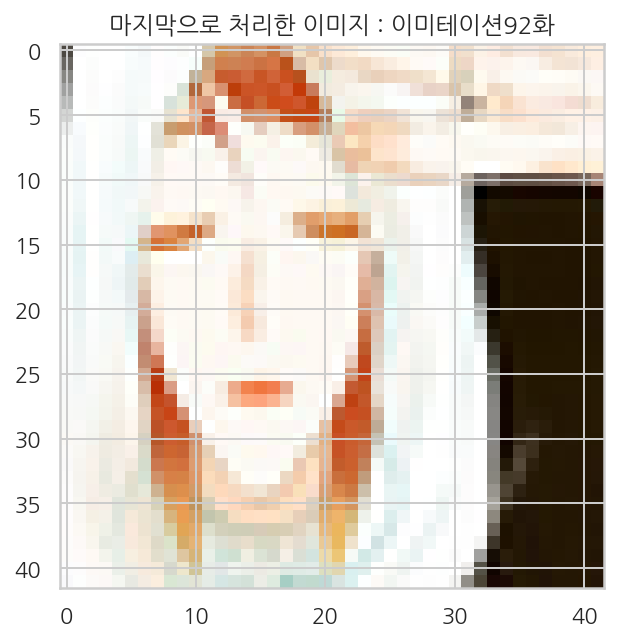

image processing complete! 42 * 42 --
마지막으로 처리한 이미지
(21028, 42, 42, 3) float32


21028

In [11]:
# 이미지 path 리스트, 가로px, 세로px, 이미지 모드

X_raw = imageToNpArray(x_dir_ls, 42, 42)
np.save('./models/500_2_42_42', X_raw)
len(X_raw)

In [11]:
X_raw = np.load('./models/500_2_42_42.npy')
len(X_raw)

21028

In [12]:
import sys

def print_size(size):
    power = 2**10
    n = 0
    power_labels = {0 : '', 1: 'K', 2: 'M', 3: 'G', 4: 'T'}
    while size > power:
        size /= power
        n += 1
    print(f'{size:.2f} {power_labels[n]}B')

print_size(sys.getsizeof(X_raw))

424.50 MB


# 레이블 전처리
- 레이블 인코딩을 통해 string to number
- 원핫 인코딩을 통해 텐서플로 모델에 입력할 수 있도록 라벨링

In [13]:
print('Y데이터형태')
num_cat = len(set(y_list))
print("갯수:",len(y_list),"// 카테고리", num_cat)

Y데이터형태
갯수: 21028 // 카테고리 25


In [14]:
# y_list 라벨데이터(string) ->  숫자 라벨로 바꾸기 
# 이후에 다시 이 숫자를 그에 대응하는 라벨(string)로 변환시키는 메소드를 사용 할 수 있다 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y_list)

In [15]:
le.classes_    # 인덱스가 클래명과 대응한다 

array(['강호진', '곽백수', '국중록', '김규삼', '김양수', '나승훈', '마영성', '마인드C', '미티',
       '박경란', '박바퀴', '박용제', '브림스', '빤쓰', '스튜디오 문', '아이리더', '양영순', '이광수',
       '이동건', '조석', '최병열', '최훈', '탐이부', '판다독', '펭귄'], dtype='<U6')

In [35]:
# train, test split
# to_categorical 함수로 라벨 원-핫 인코딩

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.05, random_state=2, stratify=y)
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.05, random_state=2, stratify=y_train)

Y_train = to_categorical(y_train, num_cat) 
Y_test = to_categorical(y_test, num_cat)
# Y_validation = to_categorical(y_validation, num_cat)

In [36]:
print('train data')
print(X_train.shape, y_train.shape)
# print('validation data')
# print(X_validation.shape, y_validation.shape)

train data
(19976, 42, 42, 3) (19976,)


In [37]:
print('test data')
print(X_test.shape, Y_test.shape)

test data
(1052, 42, 42, 3) (1052, 25)


# 이미지 증강

In [38]:
%%time

# train data augmentation 작업 - 학습 데이터 수를 늘려 정확도를 높이기 위함
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range = 90,
                                     width_shift_range = 0.1,
                                     height_shift_range = 0.1,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     fill_mode = 'nearest')

train_generator.fit(X_train)

train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))

N = 15 #오그멘테이션 할 배수
print("augmentation number : ", N)

X_train_new = []
Y_train_new = []

for i in range(N):
    print("generating "+ str(i) +" augmented data", end="... ")
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)
    print(str(i) + " augmentation complete!")
    
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

clear_output()
print("augmentation complete!!")
X_train_new.shape

augmentation complete!!
CPU times: user 3min 22s, sys: 4.42 s, total: 3min 27s
Wall time: 3min 27s


(299640, 42, 42, 3)

In [39]:
print_size(sys.getsizeof(X_train_new))

5.91 GB


**학습과정 그리는 함수**

In [21]:
def model_history(model, hist, X_test, Y_test):
    # 테스트데이터로 평가
    score = model.evaluate(X_test, Y_test, verbose=0)

    # model의 학습 과정 나타내기
    history = hist.history
    score = score

    fig, loss_ax = plt.subplots(figsize=(8, 6))

    acc_ax = loss_ax.twinx()

    loss_ax.plot(history['loss'], 'y', label='train loss')
    loss_ax.plot(history['val_loss'], 'r', label='val loss')

    acc_ax.plot(history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    clear_output()
    plt.show()
    print('test_loss : ', score[0], 'test_accuracy : ', score[1])

# CNN 모델 생성

In [32]:
from tensorflow.keras.models import load_model
model_num = 5
loaded_model = load_model(f'./models/500_model{model_num}_checkpoint_4242.h5')

In [34]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 42, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 42, 42, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

# 모델 컴파일

In [40]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습

In [41]:
%%time

# 학습시작
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

model_num = 6

save_path = './models/500_model{}_checkpoint_4242.h5'.format(model_num)
checkpoint = ModelCheckpoint(save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

hist = loaded_model.fit(X_train_new, Y_train_new, epochs=50, batch_size=2048, validation_data=(X_test, Y_test), verbose=1, callbacks=[checkpoint])

np.save('./models/500_model{}_history_4242'.format(model_num), hist.history)
model.save('./models/500_model{}_4242.h5'.format(model_num))

Epoch 1/50
147/147 [==============================] - 58s 384ms/step - loss: 0.7488 - accuracy: 0.8104 - val_loss: 1.1357 - val_accuracy: 0.7462

Epoch 00001: val_loss improved from inf to 1.13567, saving model to ./models/500_model6_checkpoint_4242.h5
Epoch 2/50
147/147 [==============================] - 53s 359ms/step - loss: 0.3429 - accuracy: 0.8938 - val_loss: 1.0942 - val_accuracy: 0.7776

Epoch 00002: val_loss improved from 1.13567 to 1.09417, saving model to ./models/500_model6_checkpoint_4242.h5
Epoch 3/50
147/147 [==============================] - 53s 359ms/step - loss: 0.3342 - accuracy: 0.8970 - val_loss: 1.1566 - val_accuracy: 0.7595

Epoch 00003: val_loss did not improve from 1.09417
Epoch 4/50
147/147 [==============================] - 53s 359ms/step - loss: 0.3220 - accuracy: 0.8987 - val_loss: 1.2594 - val_accuracy: 0.7424

Epoch 00004: val_loss did not improve from 1.09417
Epoch 5/50
147/147 [==============================] - 53s 363ms/step - loss: 0.3125 - accuracy: 

## 학습 완료 후 시각화

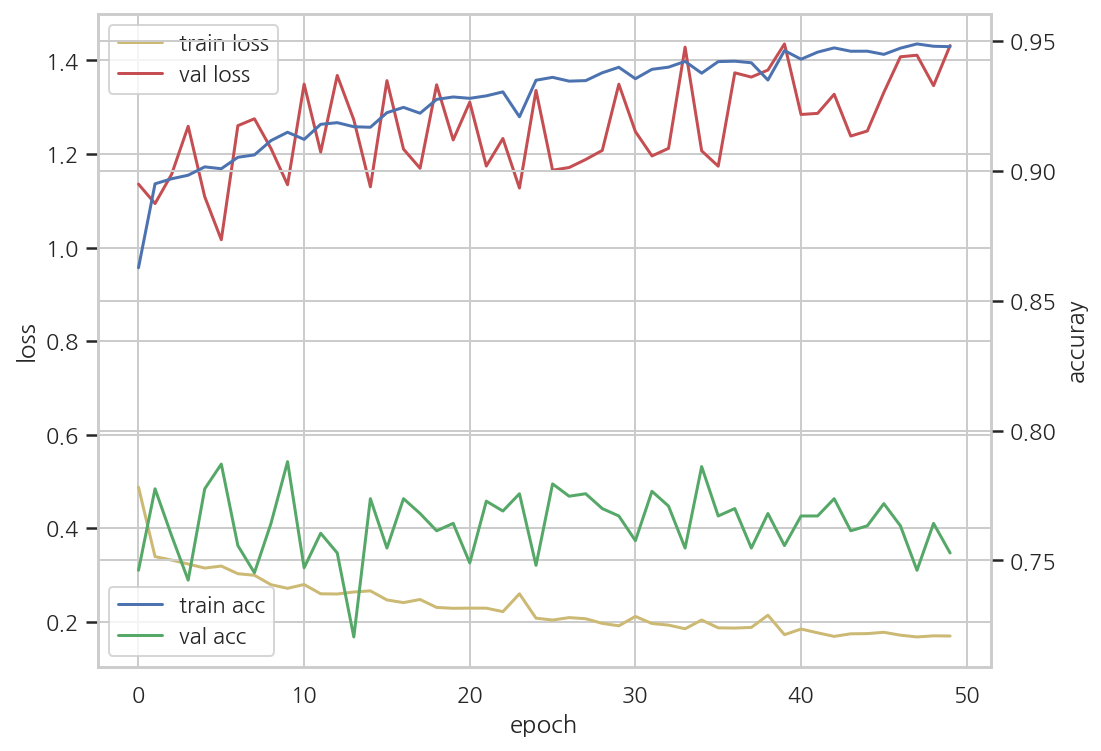

test_loss :  1.432096242904663 test_accuracy :  0.7528517246246338


In [66]:
model_history(loaded_model, hist, X_test, Y_test)

# 모델 평가

In [43]:
from tensorflow.keras.models import load_model
model_num = 6
loaded_model2 = load_model(f'./models/500_model{model_num}_checkpoint_4242.h5')

## test 데이터로 평가

In [44]:
loss_test, accuracy_test = loaded_model2.evaluate(X_test, Y_test, verbose=1)
print(f'정확도 : {accuracy_test:.4f}, loss : {loss_test:.4f}')

33/33 [==============================] - 1s 10ms/step - loss: 1.0168 - accuracy: 0.7871
정확도 : 0.7871, loss : 1.0168


In [45]:
y_pred = loaded_model2.predict(X_test, verbose=0)

In [46]:
result_df_test = pd.DataFrame()

# 원래의 y 카테고리 명칭
result_df_test['id'] = le.inverse_transform(y_test)

result_df_test = pd.concat([result_df_test,pd.DataFrame(y_pred)],axis=1)
clear_output()
result_df_test.tail()
print("(테스트 데이터 갯수, 카테고리 갯수) : ", y_pred.shape)

id             0             1             2             3             4             5             6             7             8             9            10            11            12            13            14            15            16            17            18            19            20            21            22            23            24
1047   강호진  9.634167e-01  3.834981e-04  3.298858e-07  1.836473e-05  5.337181e-05  8.176320e-06  1.543708e-05  5.865056e-07  8.216111e-05  3.039558e-07  2.769935e-11  3.353863e-06  2.029489e-07  6.190102e-04  9.839700e-11  5.946128e-07  1.453433e-02  3.006136e-06  1.143258e-05  2.082643e-02  1.325524e-05  1.102236e-06  5.380102e-07  7.737457e-06  1.559652e-07
1048   박바퀴  5.035586e-14  4.453735e-09  3.744280e-10  4.783109e-29  1.410193e-23  3.059184e-09  1.516415e-12  1.306596e-15  2.719906e-26  2.428621e-26  1.000000e+00  1.911466e-27  6.452777e-28  1.772514e-15  1.119920e-32  1.227070e-28  3.150480e-18  2.162088e-19  3.934651e-25  5.003013e-08  8.975014e-19  2.708354e-24  5.713568e-15  5.763535e-14  1.369279e-10
1049  아이리더  1.012491e-07  1.285772e-17  4.993255e-08  5.768000e-08  9.123812e-13  2.490429e-12  9.920391e-06  2.437723e-11  1.675982e-07  5.816005e-10  3.948769e-23  2.389104e-09  1.893109e-04  5.894751e-14  5.941163e-11  9.998004e-01  8.219056e-15  1.210280e-07  1.328276e-10  9.804228e-13  4.724322e-14  7.637443e-18  8.187000e-11  3.468733e-13  5.405994e-11
1050   김양수  5.925632e-04  2.309761e-04  1.176864e-06  8.086914e-06  9.433581e-01  4.102333e-02  5.852623e-07  1.423096e-02  2.842310e-07  1.950087e-07  1.174359e-09  4.183653e-08  5.671719e-09  1.747464e-04  1.724020e-12  3.004918e-06  2.423149e-06  1.333530e-07  9.921499e-05  3.510826e-05  8.581221e-08  6.535649e-06  4.495246e-06  2.114339e-04  1.656519e-05
1051   나승훈  6.238306e-09  4.309284e-11  8.267494e-11  1.024386e-11  2.958821e-12  1.000000e+00  1.250128e-10  2.668190e-10  1.584614e-18  1.680065e-24  7.125748e-15  7.553259e-17  2.081765e-21  3.052904e-14  1.740443e-27  4.264653e-12  6.860611e-15  1.333129e-15  2.734327e-13  1.515840e-11  5.548473e-17  4.034794e-14  2.057552e-09  1.117677e-11  5.910404e-15

(테스트 데이터 갯수, 카테고리 갯수) :  (1052, 25)


In [47]:
# 직접 눈으로 비교해주는 함수
def plot_similar_wbt(find_index, result_df, X):
    '''
    find_index : 찾을 인덱스 (순서)
    result_df : 행은 이미지 데이터, 열은 각 웹툰일 확률
    X : 원본 이미지 데이터 리스트
    '''
    
    # 확인할 이미지 데이터
    img = X[find_index]
    
    # 확인할 이미지 데이터의 레이블(작가)
    real_file_name = result_df.id[find_index]
    
    # 확인할 이미지의 확률 데이터
    finded = result_df.iloc[find_index, 1:]
    
    # 확인할 데이터의 각 웹툰별 확률
    temp = pd.DataFrame()
    temp['id'] = le.inverse_transform(list(finded.index))
    temp['proba'] = finded
    top10_df = temp.sort_values('proba', ascending=False).head(10)
    
    # top10 웹툰 임의의 이미지 경로 가져오기
    top10_path_list = []
    for author in top10_df['id']:
        d = './data/train3/' + author + '/*'
        l = glob.glob(d)
        top10_path_list.append(l[2]) # 임의로 1번 인덱스의 이미지 가져오기
    
    title_list = []
    for each_path in top10_path_list:
        title = each_path.split('/')[-1]
        title = title.split('_')[0]
        title += ', ' + each_path.split('/')[-2]
        title_list.append(title)
    
    
    # 확인할 이미지 출력
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.grid(False)
    info = result_df.id[find_index]
    plt.title(info, fontsize='medium')
    plt.xticks([])
    plt.yticks([])
    
    
    # top10 이미지 출력
    i = 0
    plt.figure(figsize=(15, 8))
    for each_path in top10_path_list:   
        plt.subplot(2, 5, i + 1)  
        picture = pil.open(each_path).resize((50, 50), pil.ANTIALIAS)
        plt.imshow(picture)
        plt.grid(False)
        
        plt_title = f"title : {title_list[i]}\nproba={top10_df.iloc[i, 1]:.5f}"
        plt.title(plt_title, fontsize='medium')
        plt.xticks([])
        plt.yticks([])
        i += 1

    plt.show()

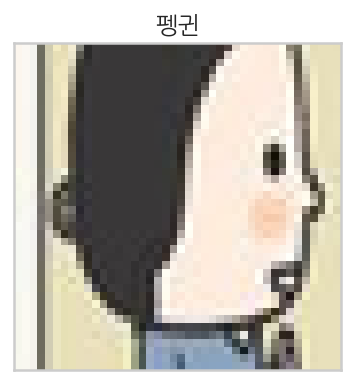

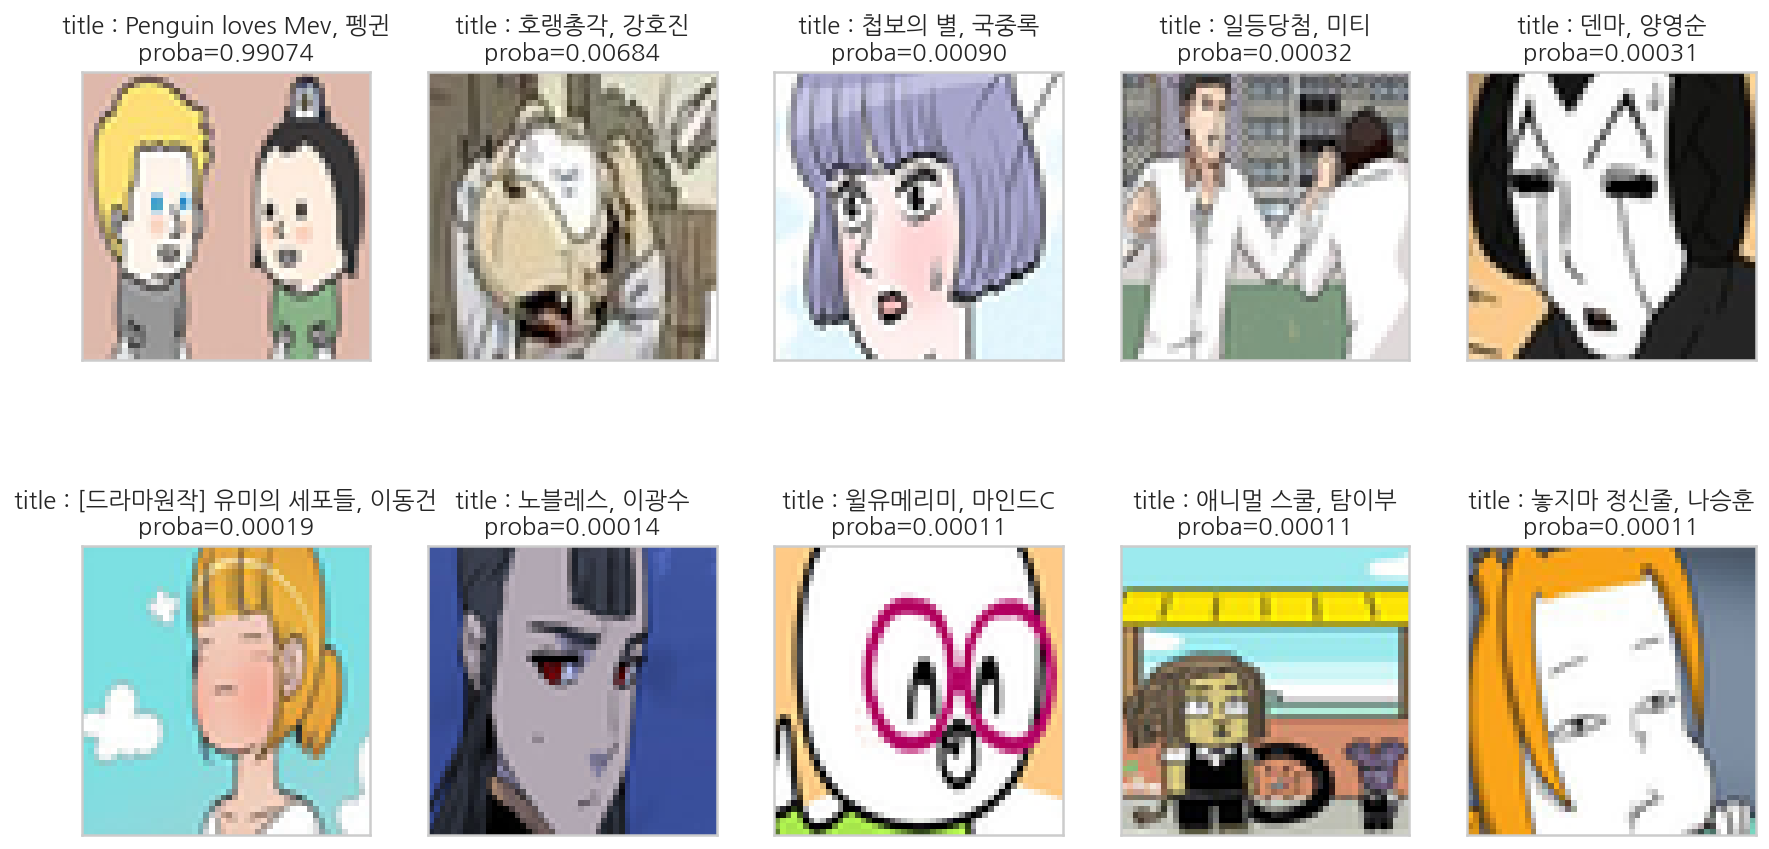

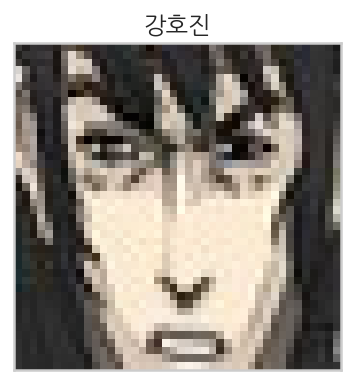

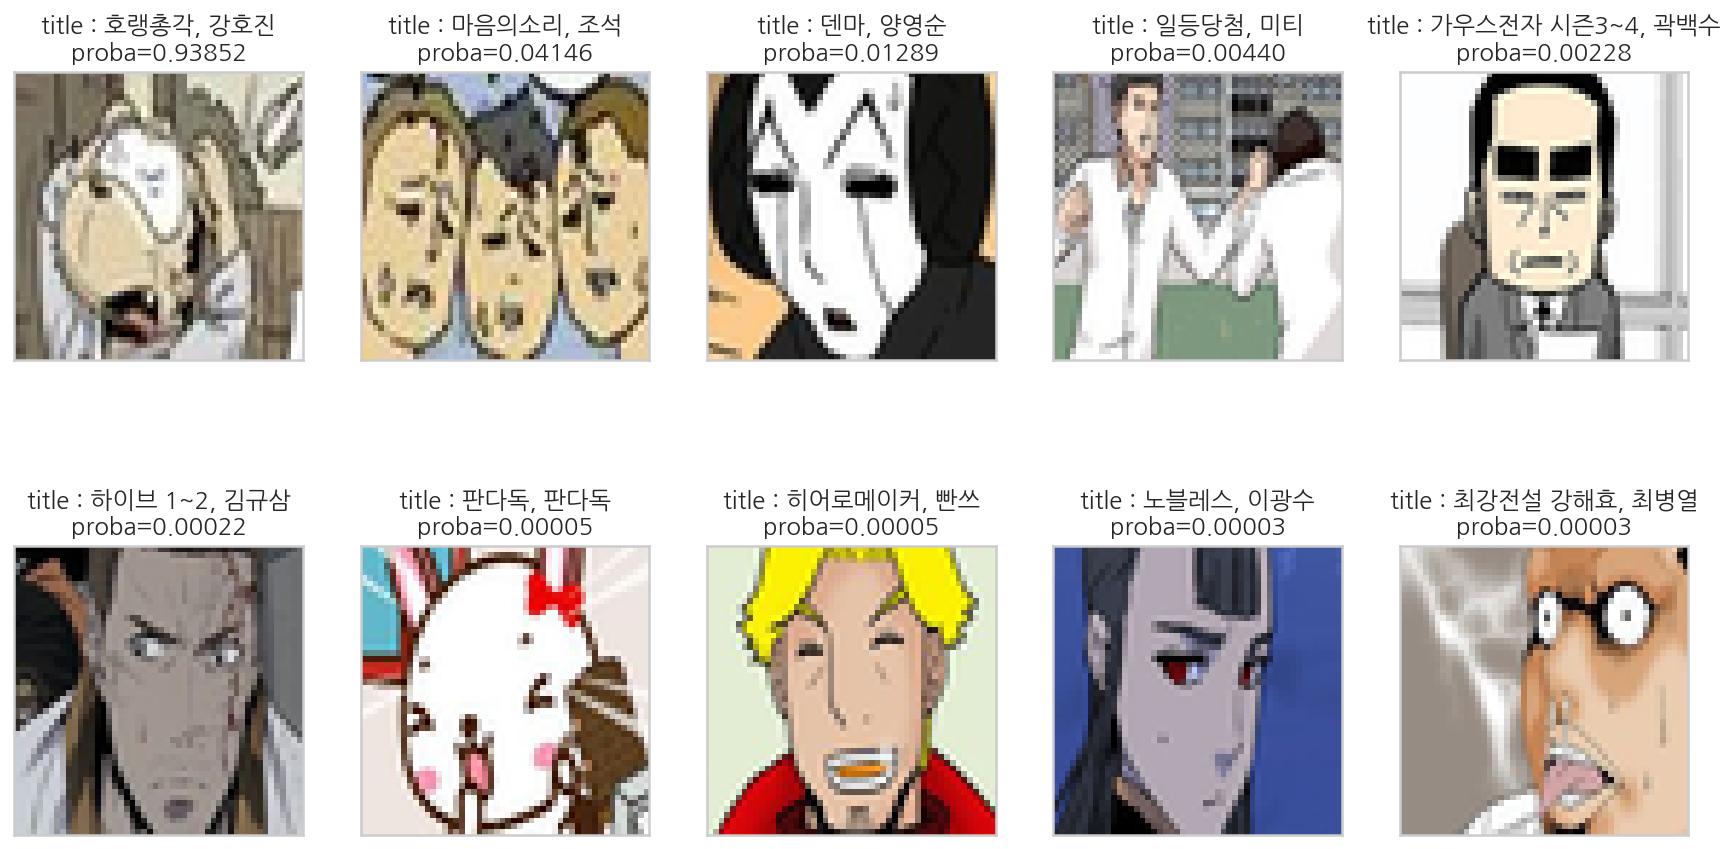

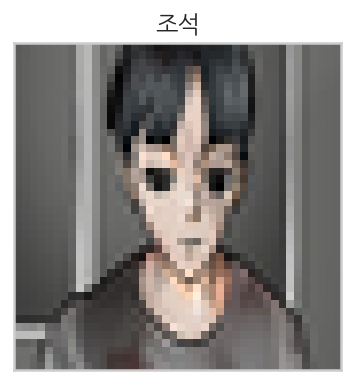

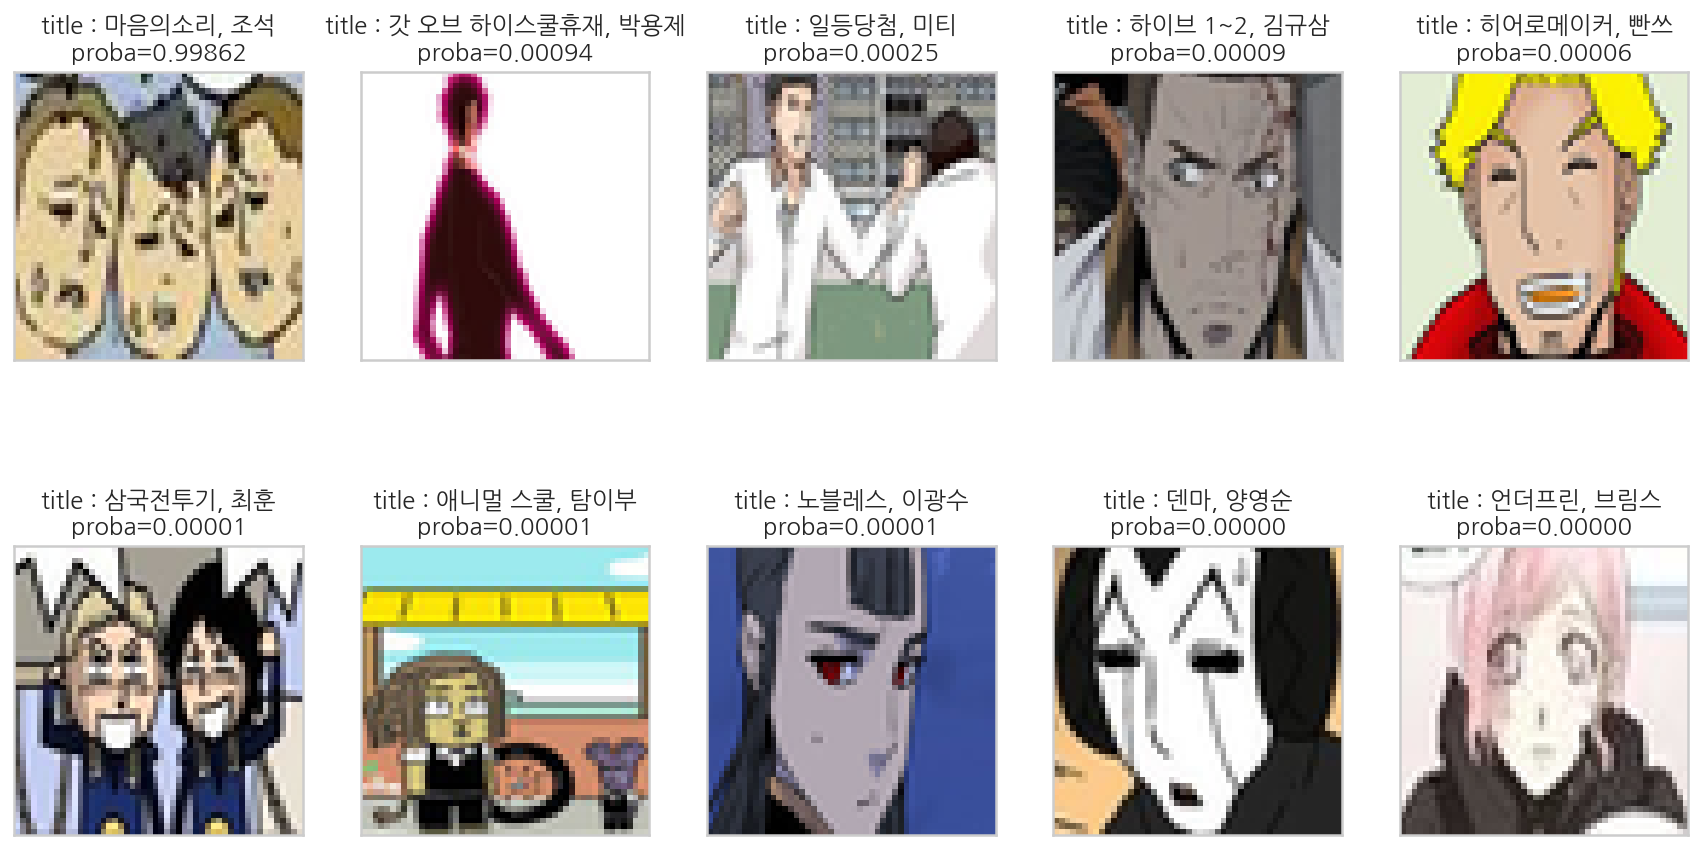

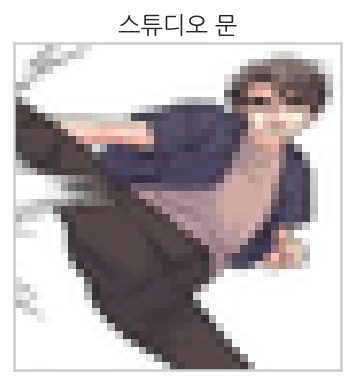

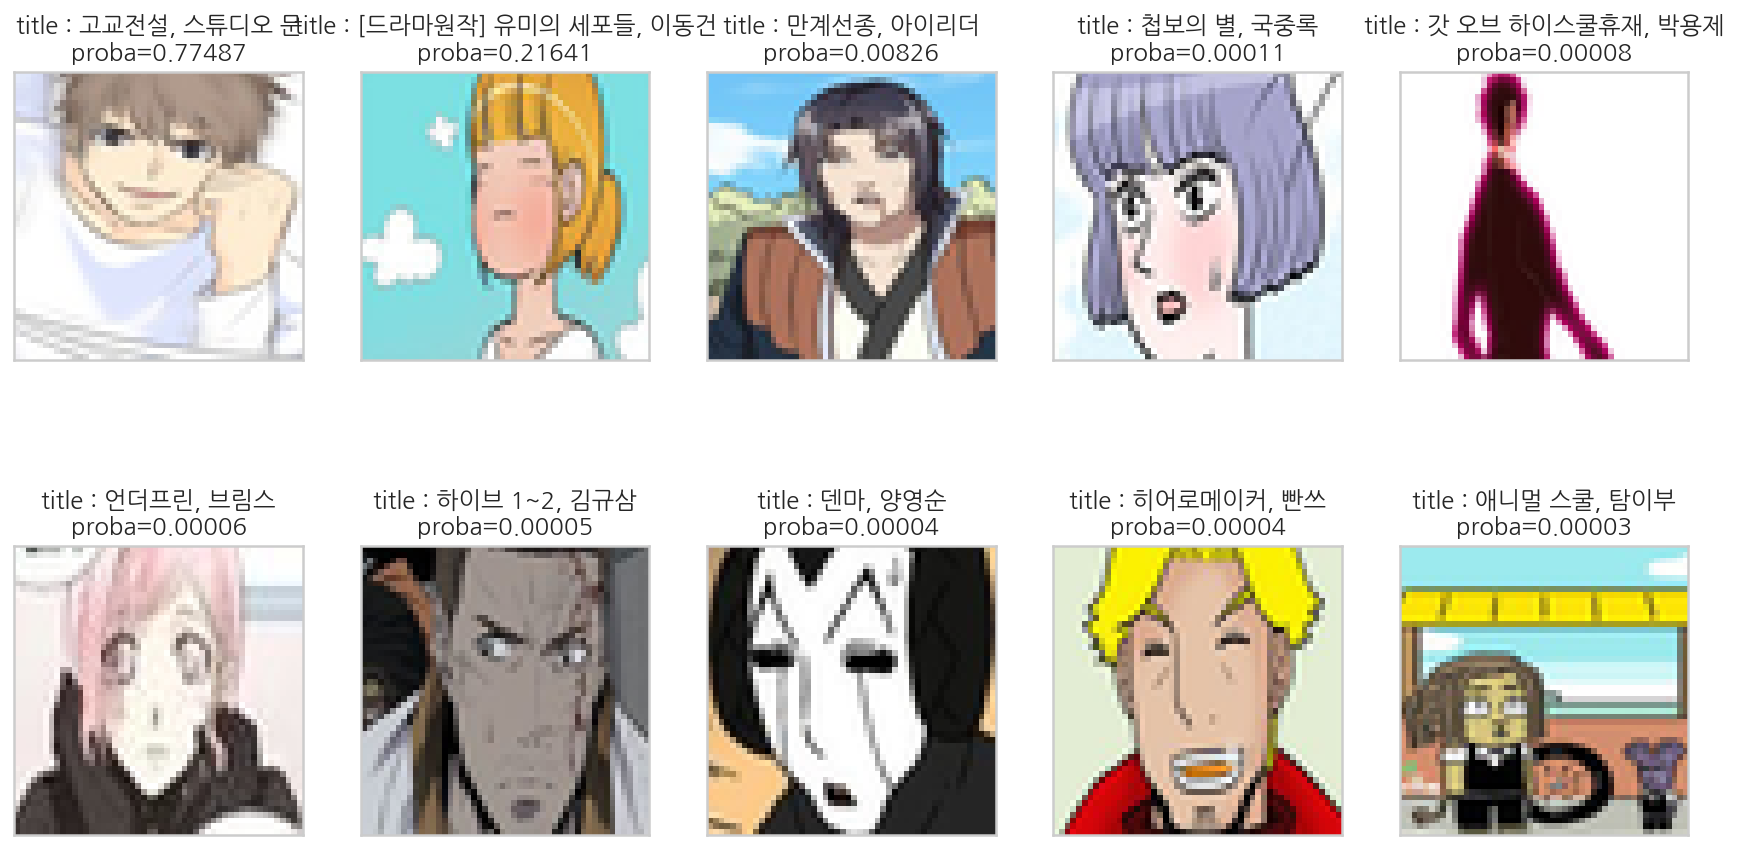

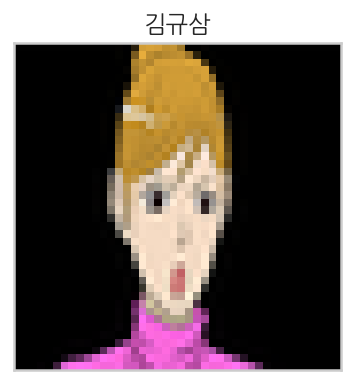

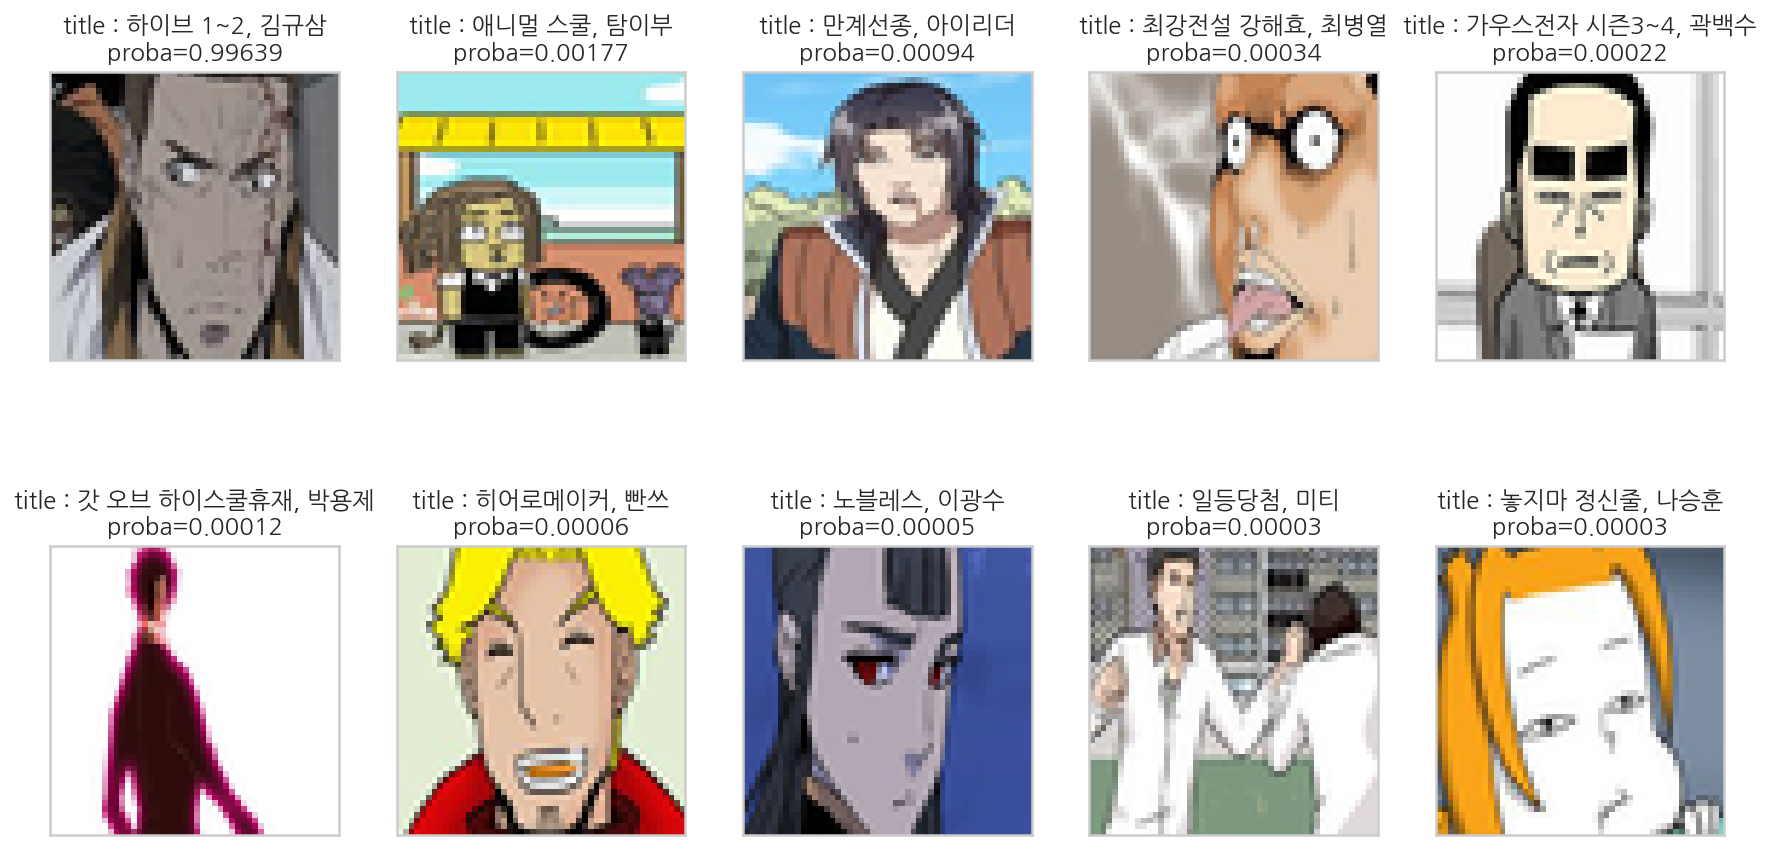

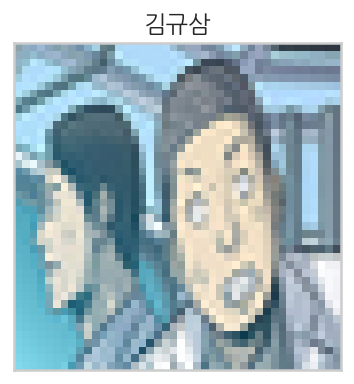

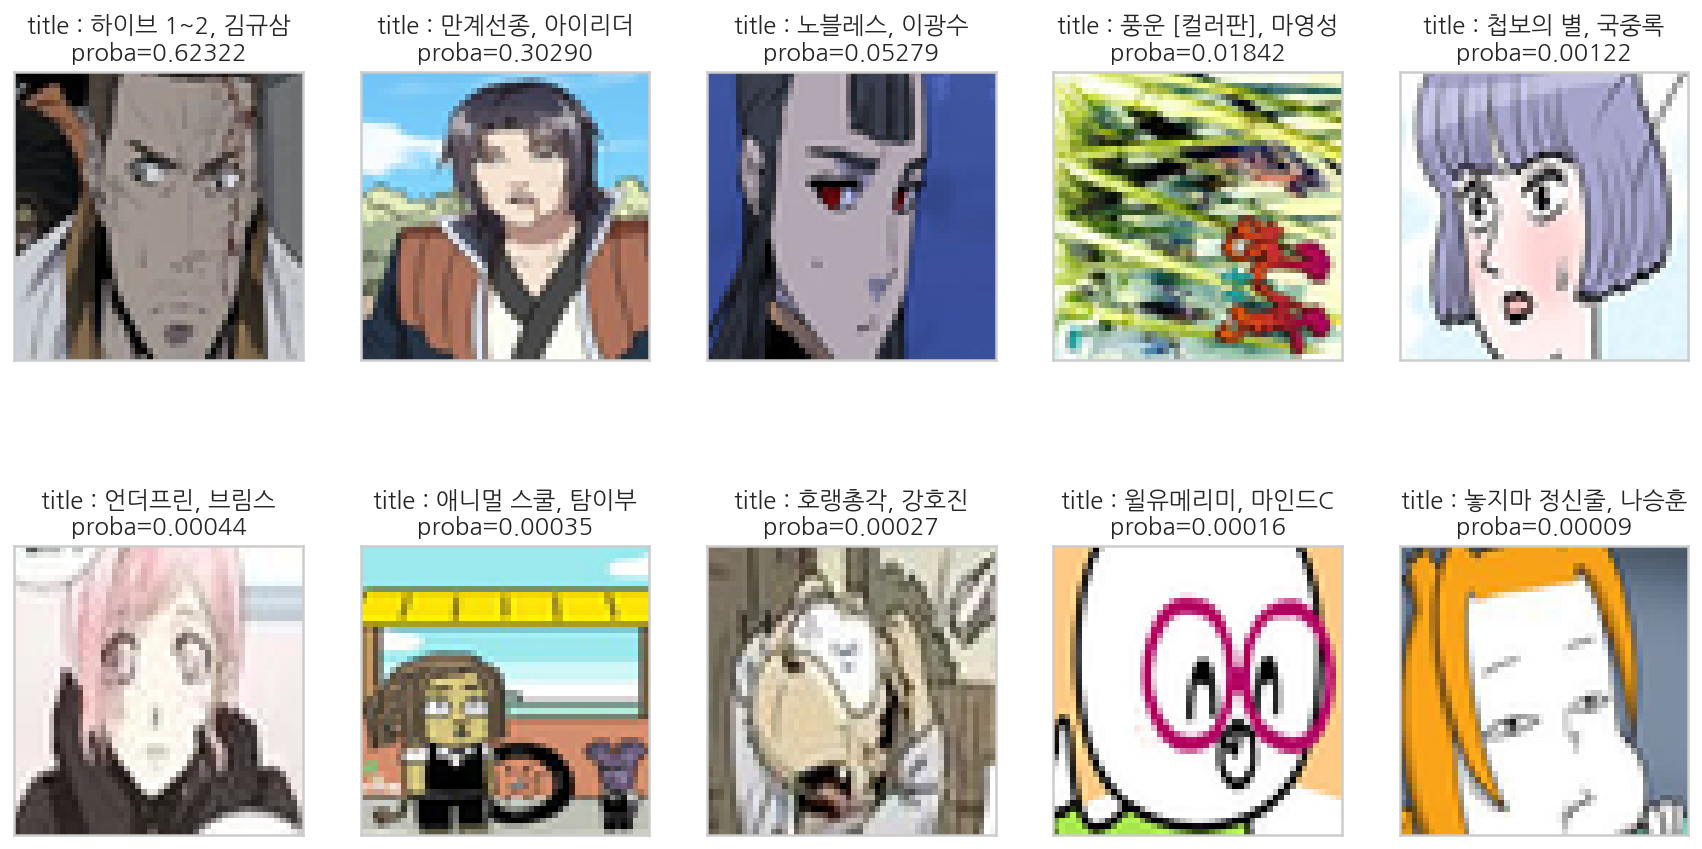

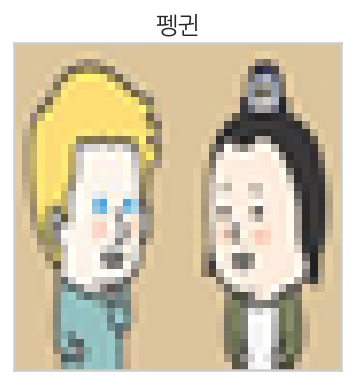

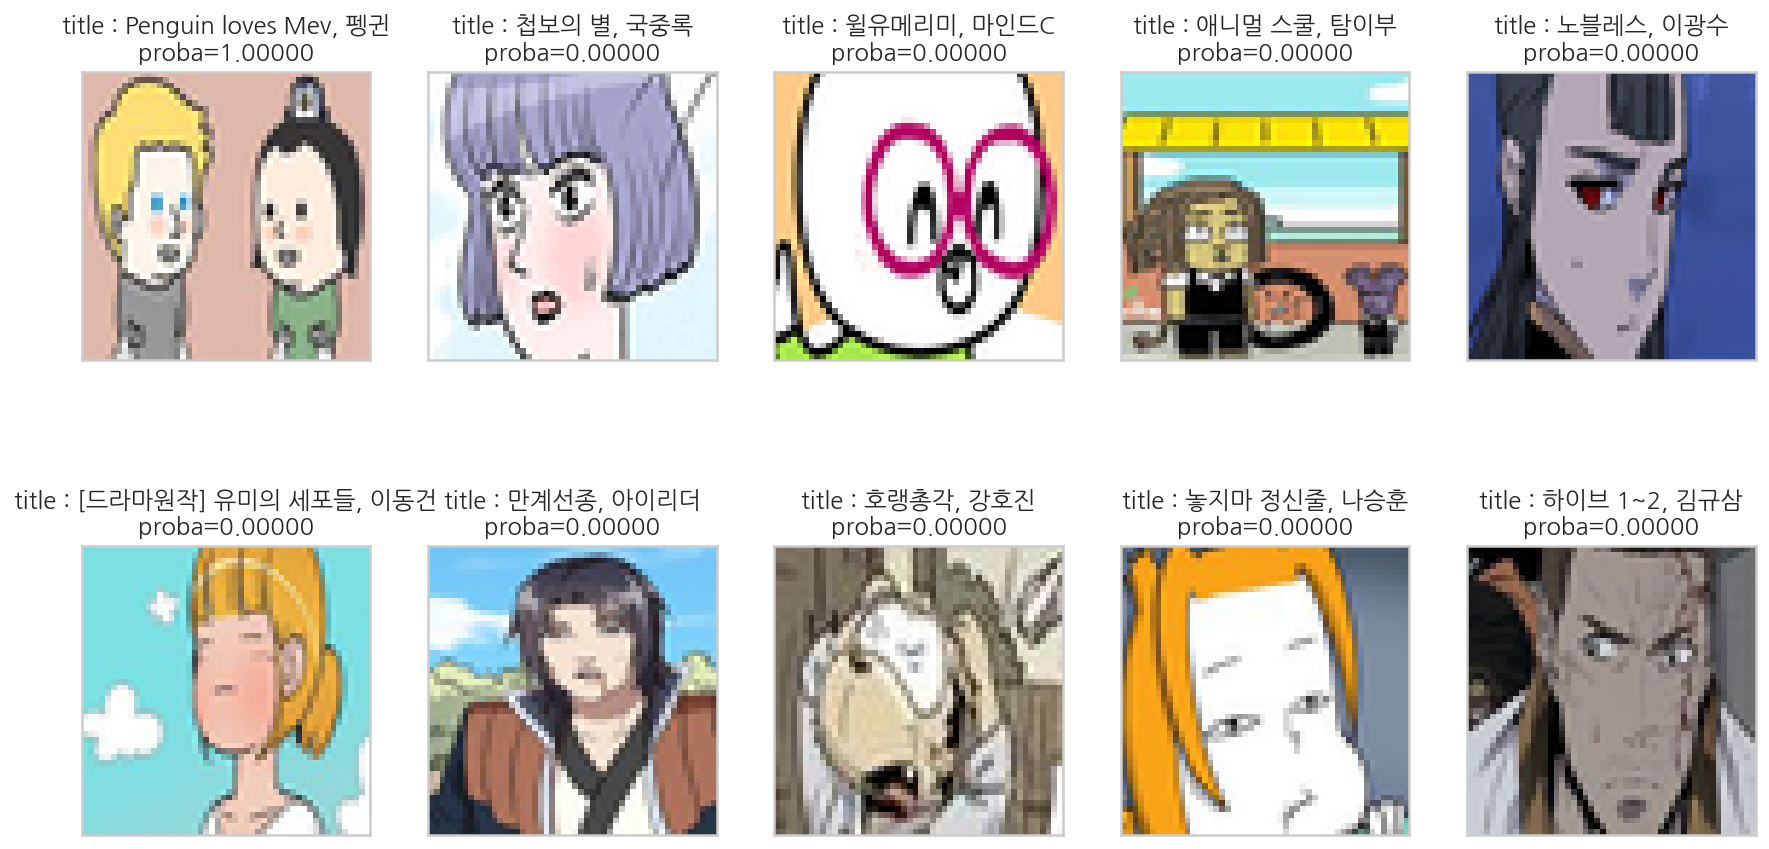

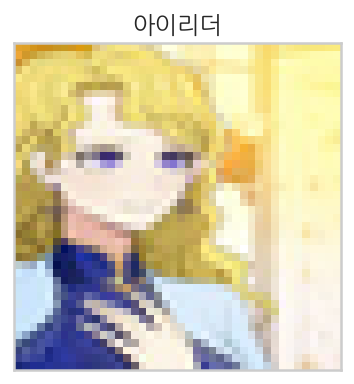

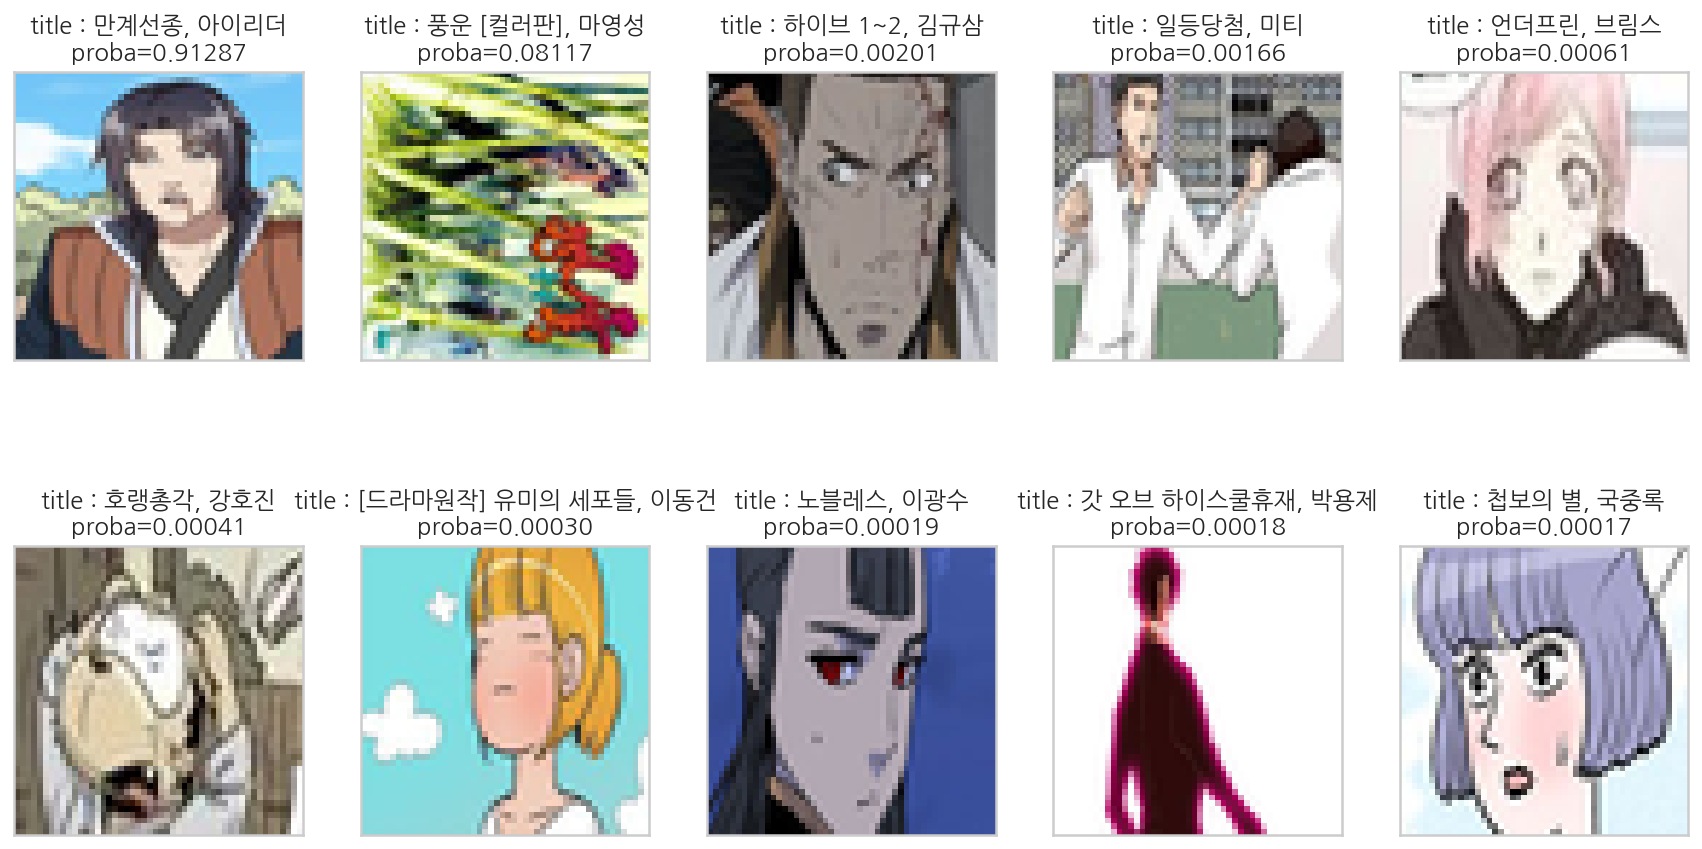

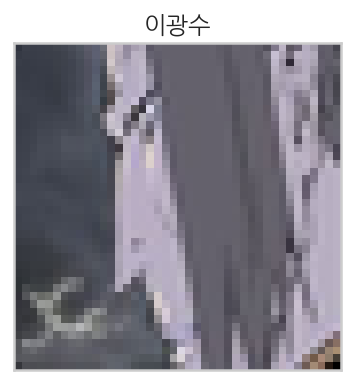

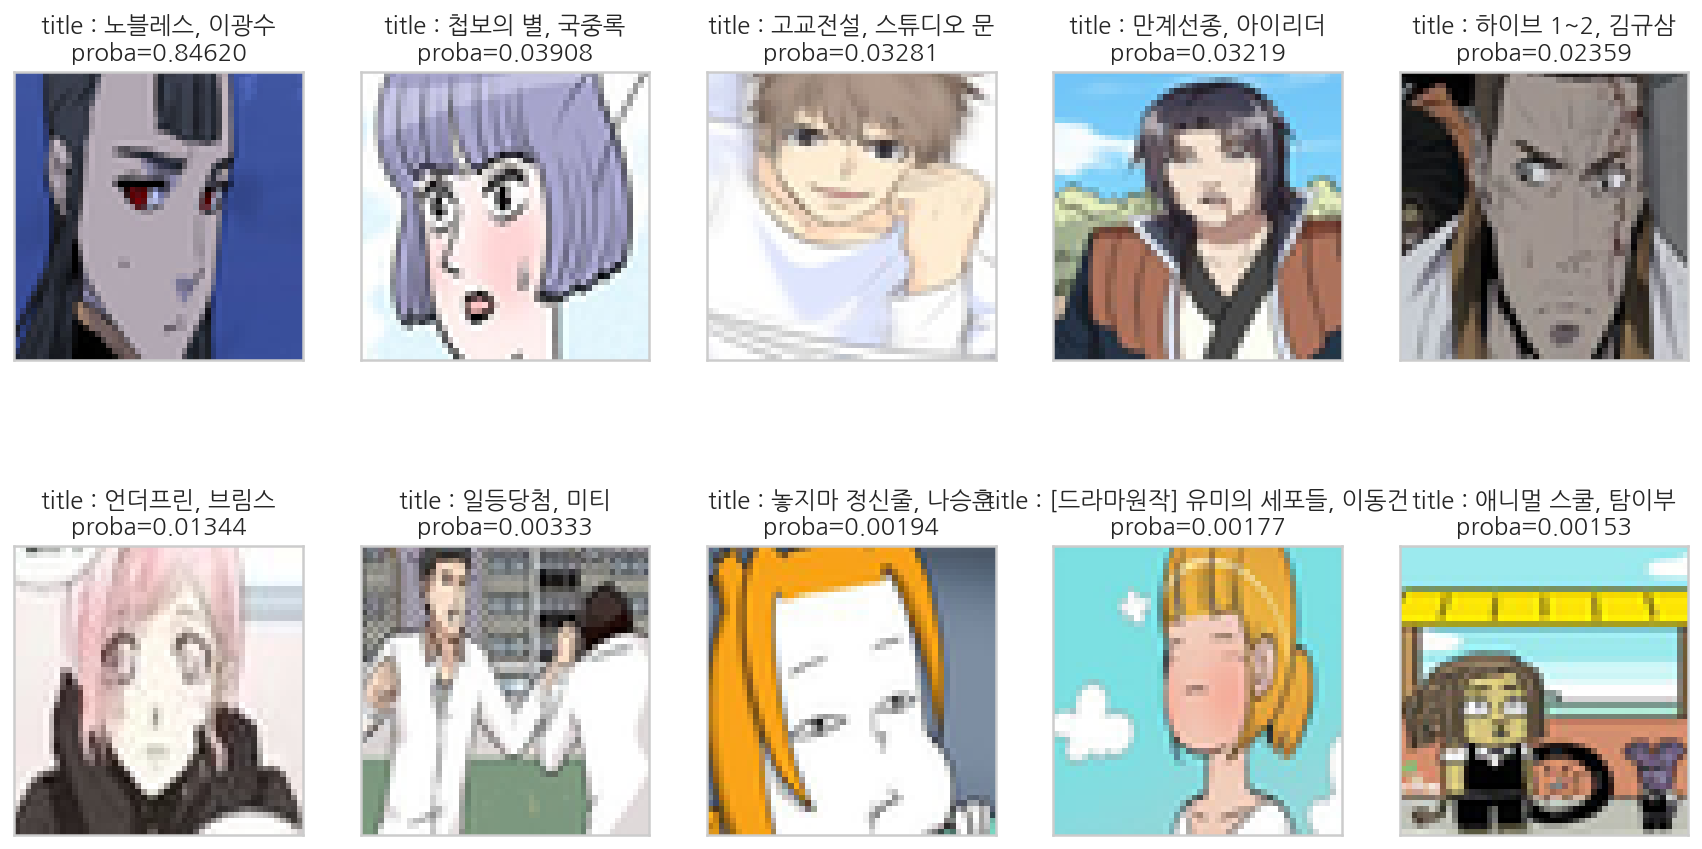

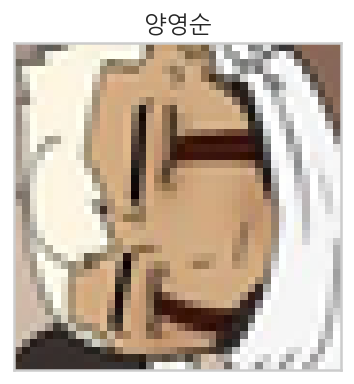

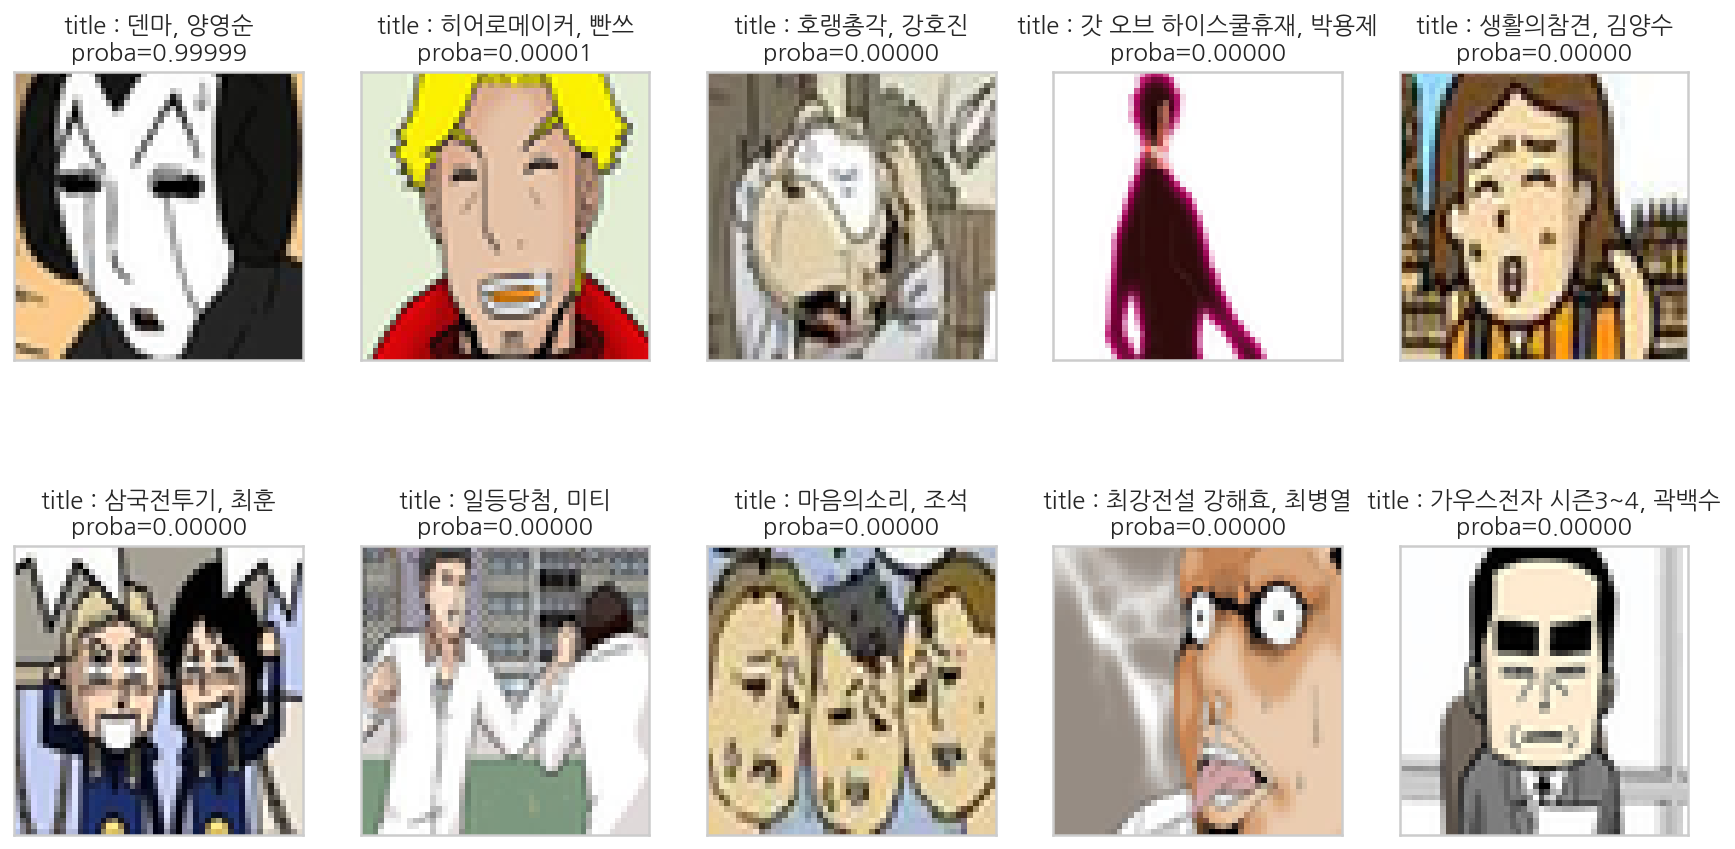

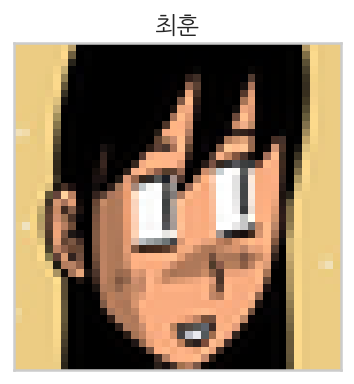

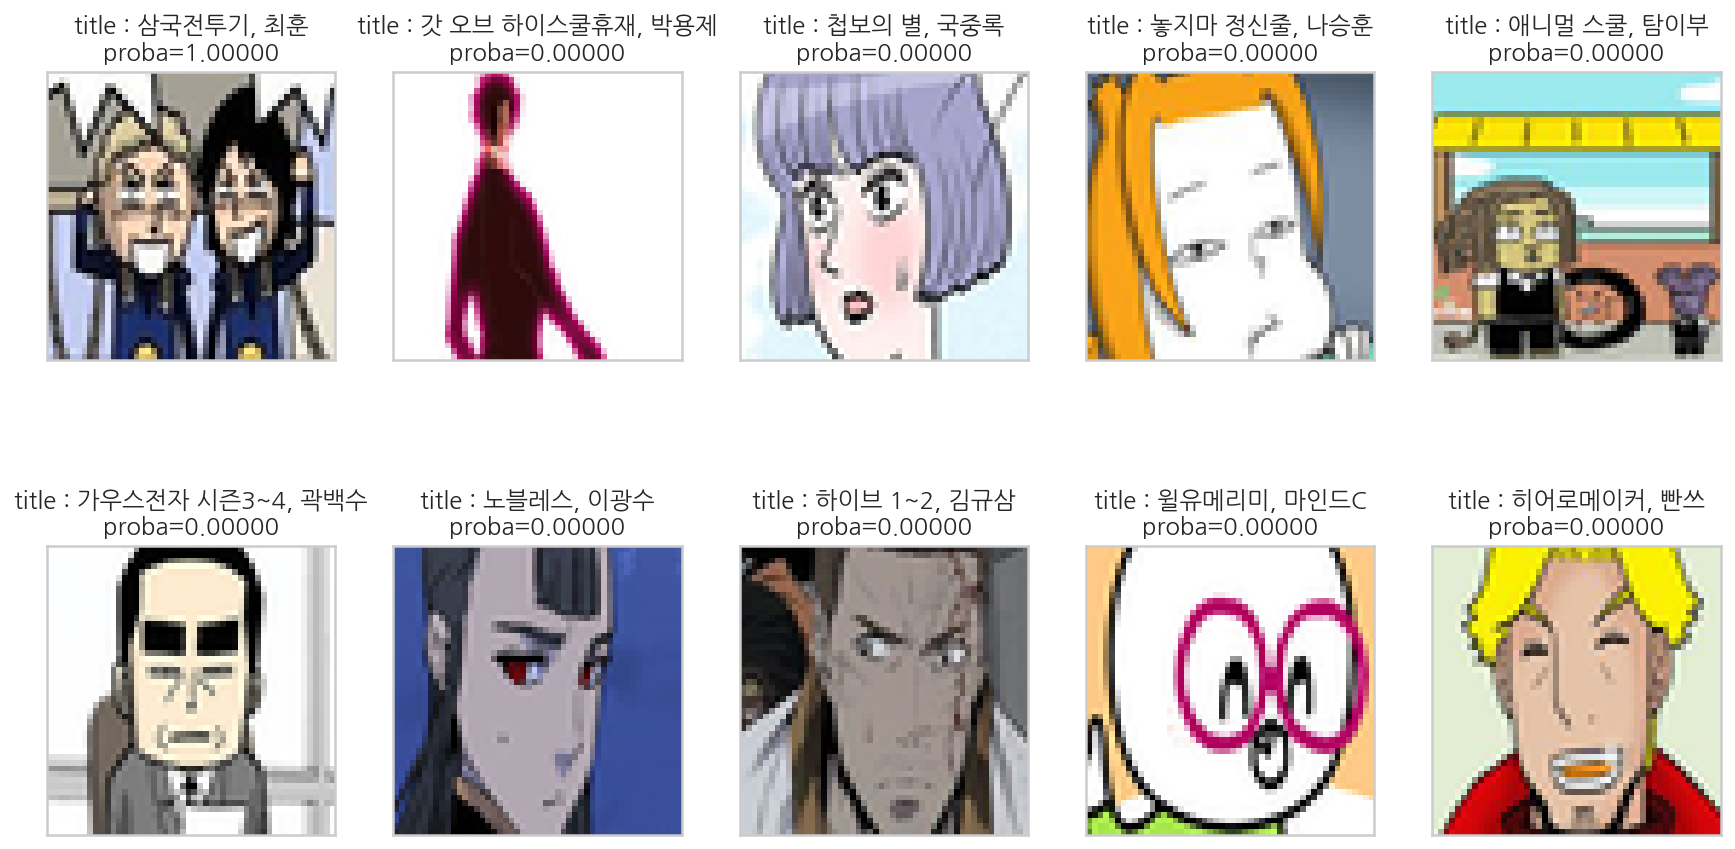

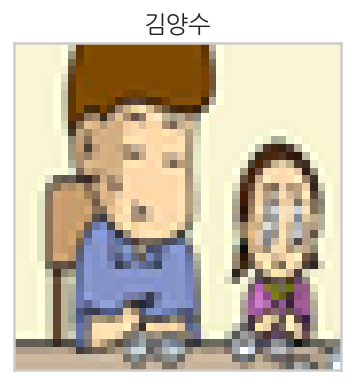

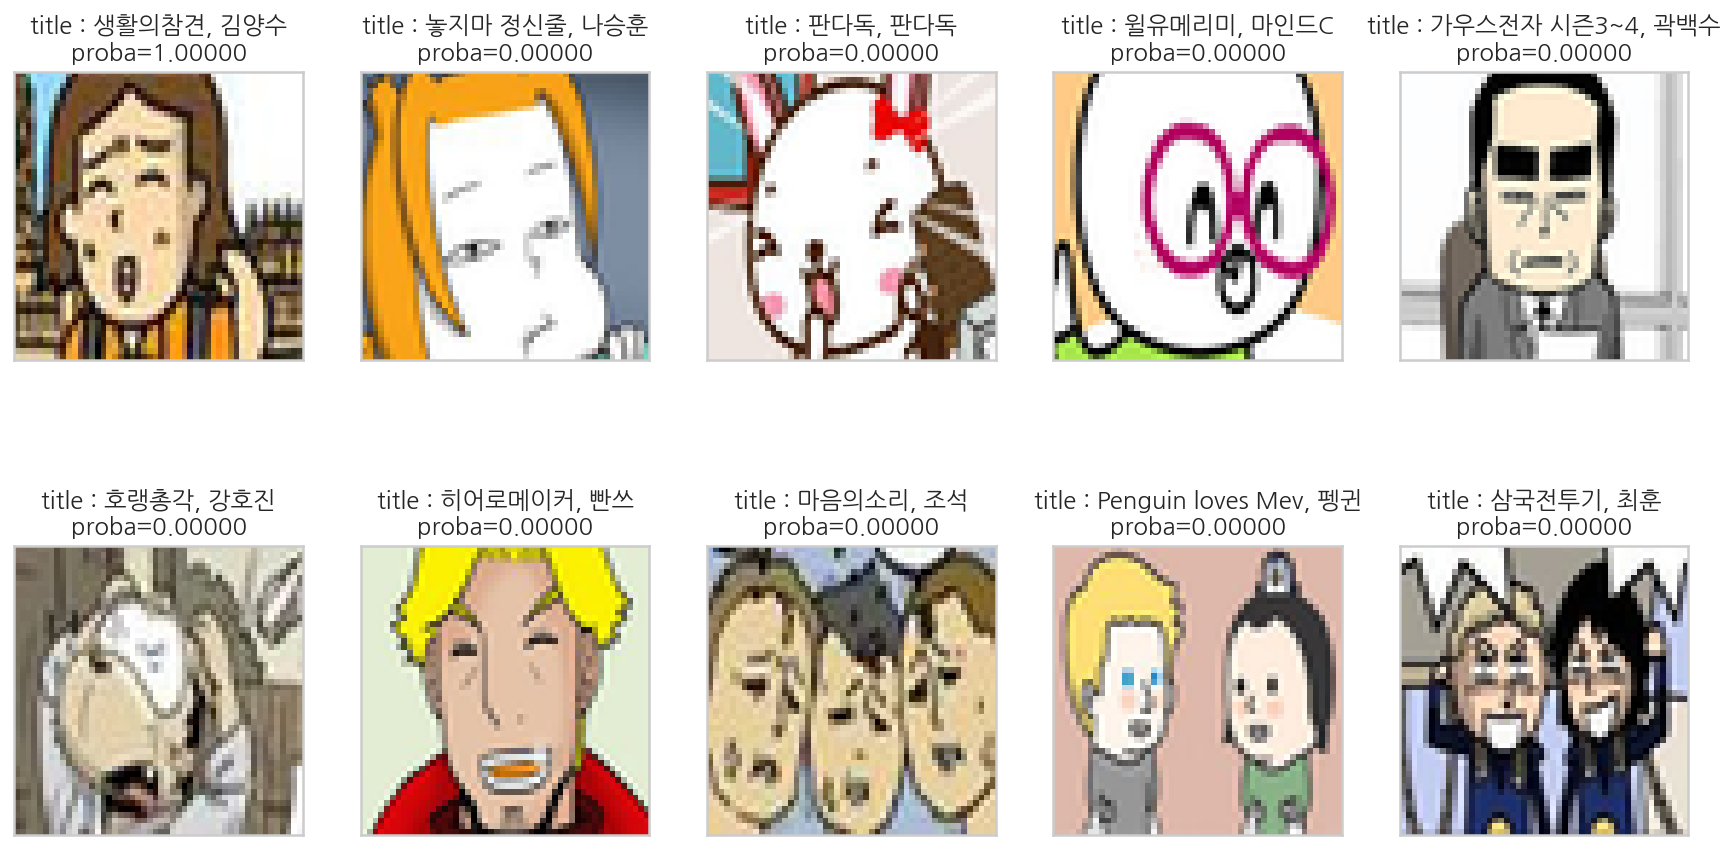

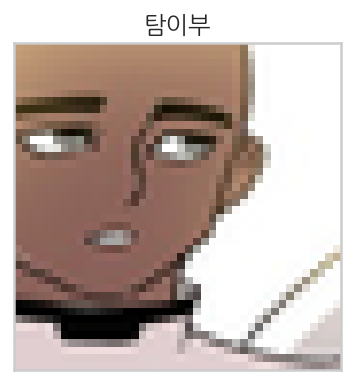

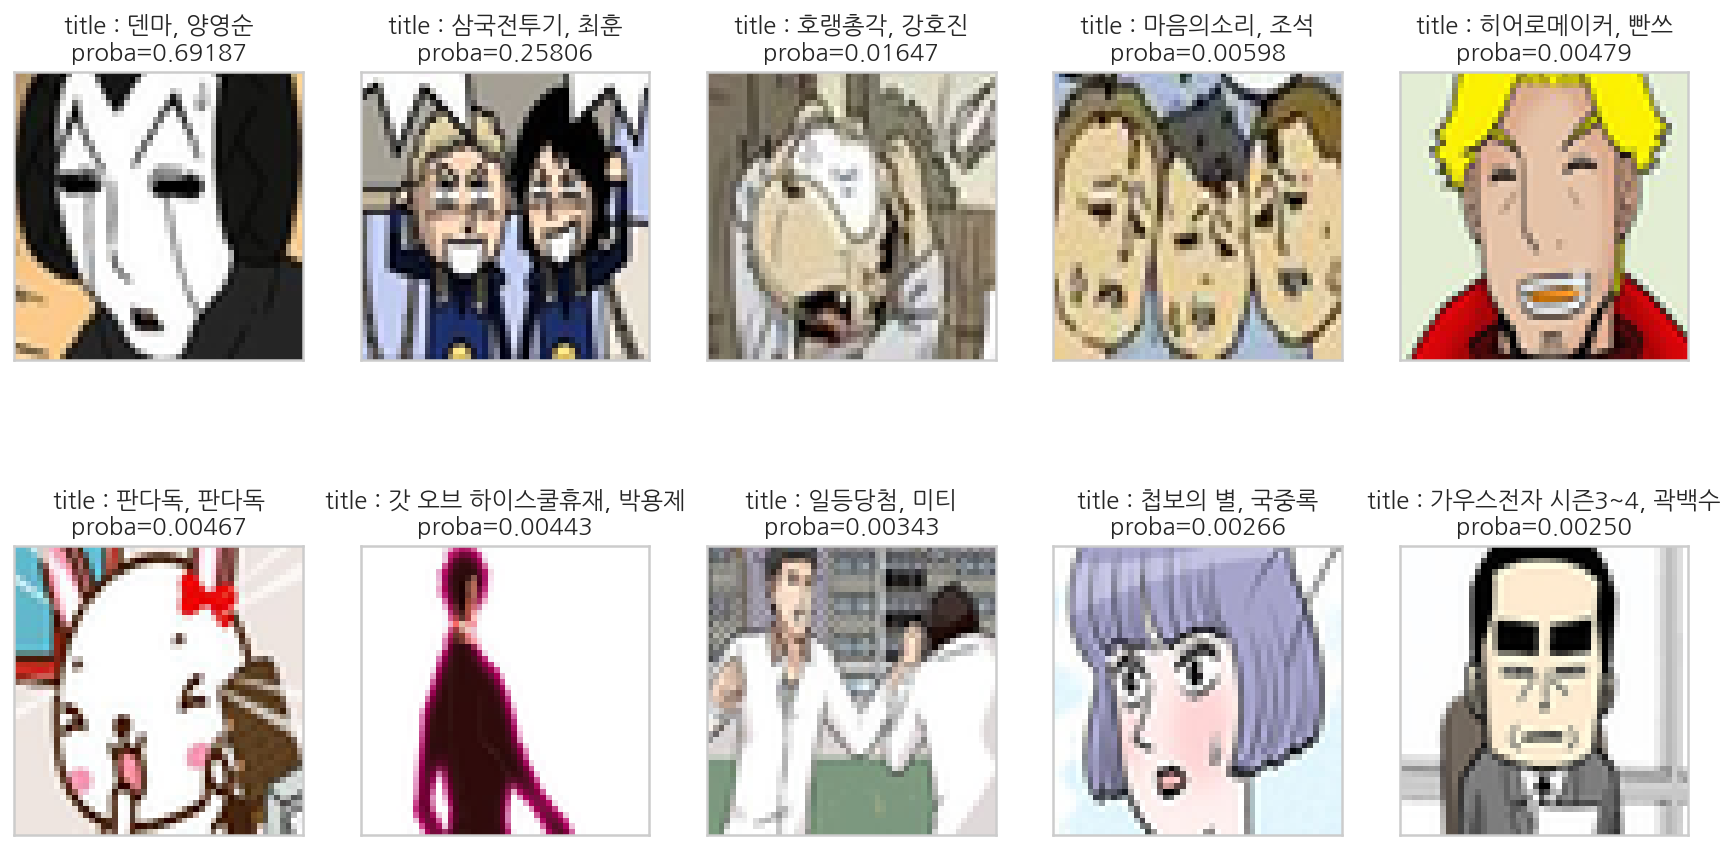

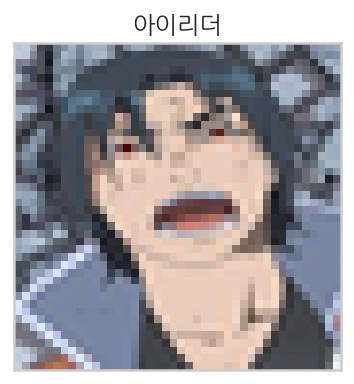

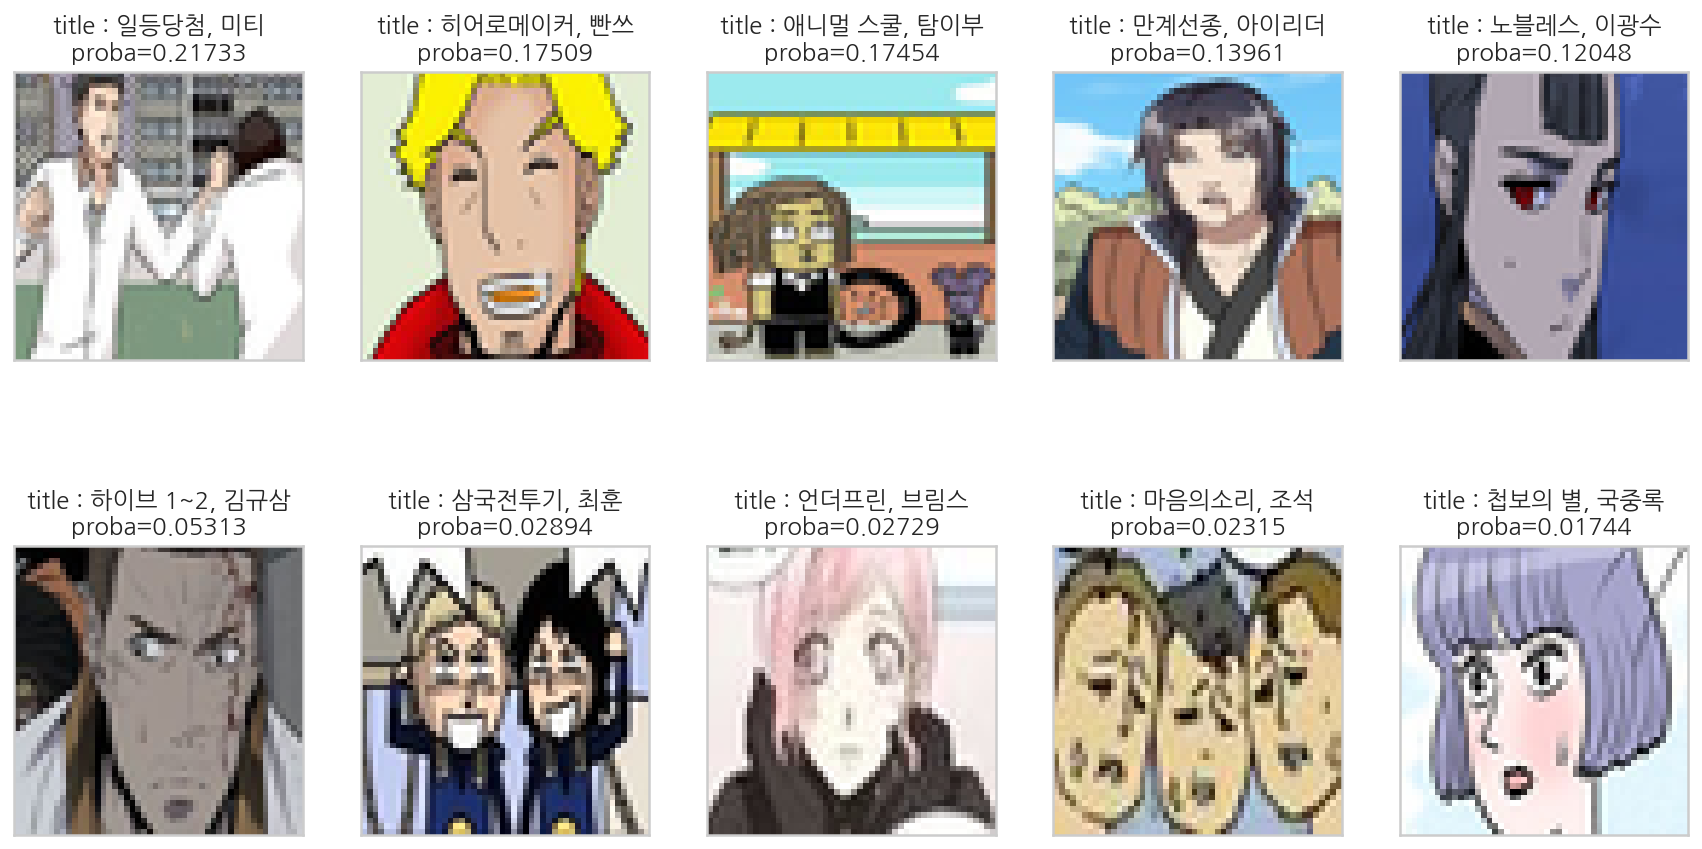

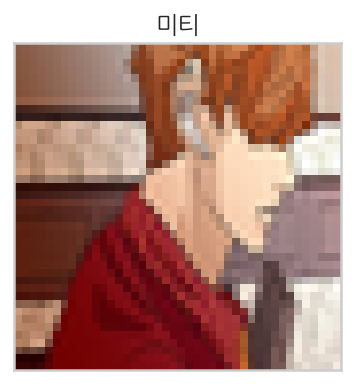

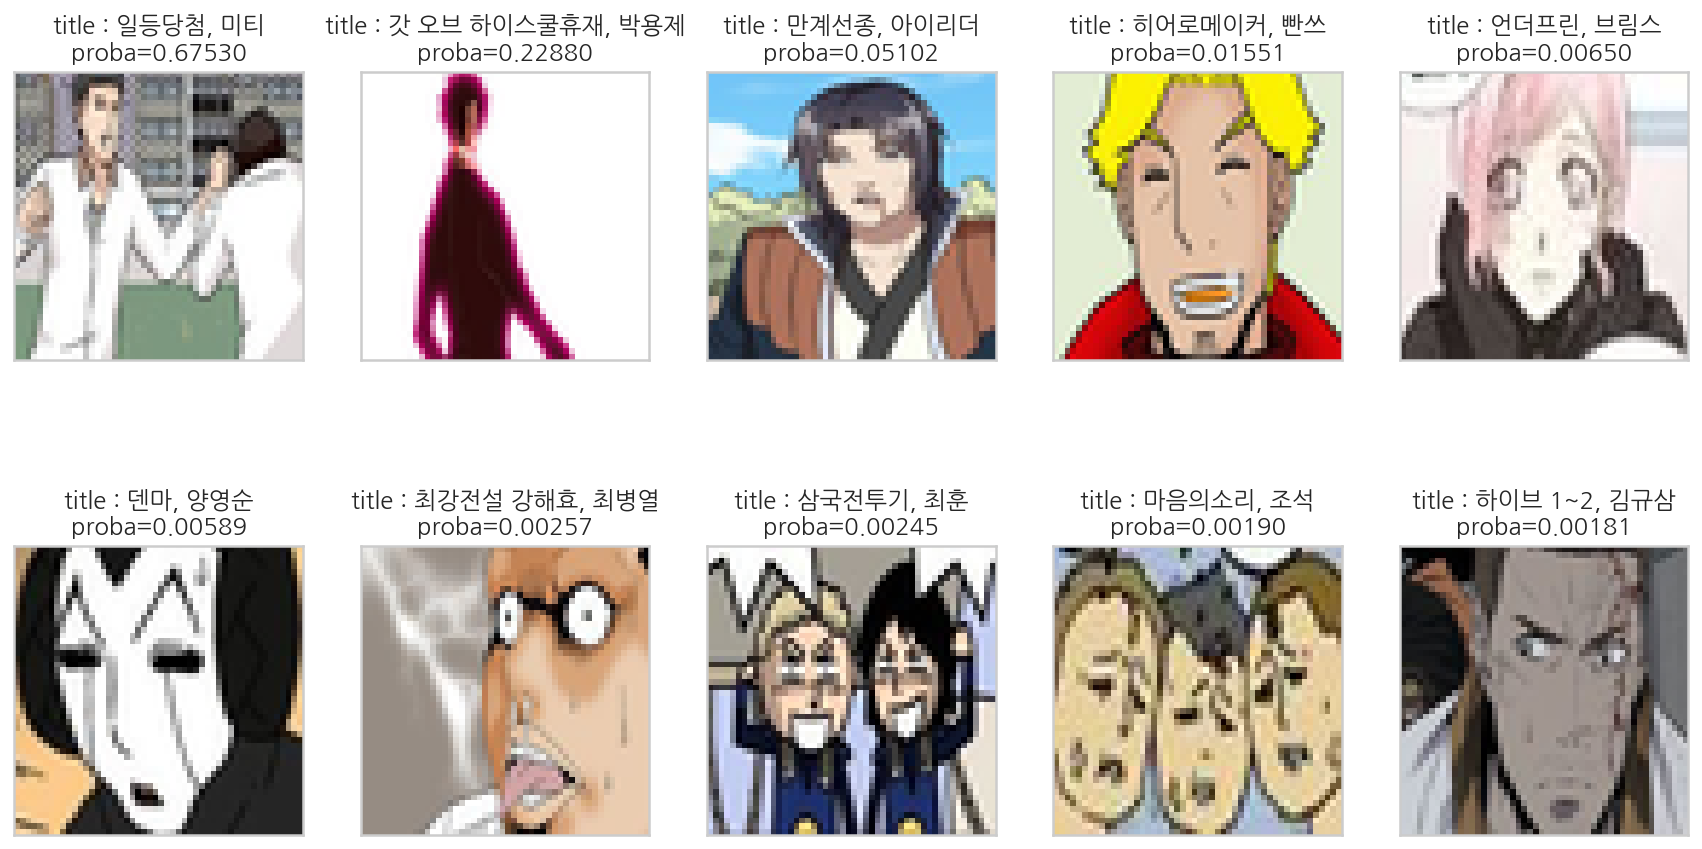

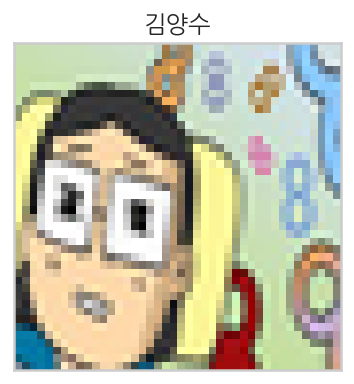

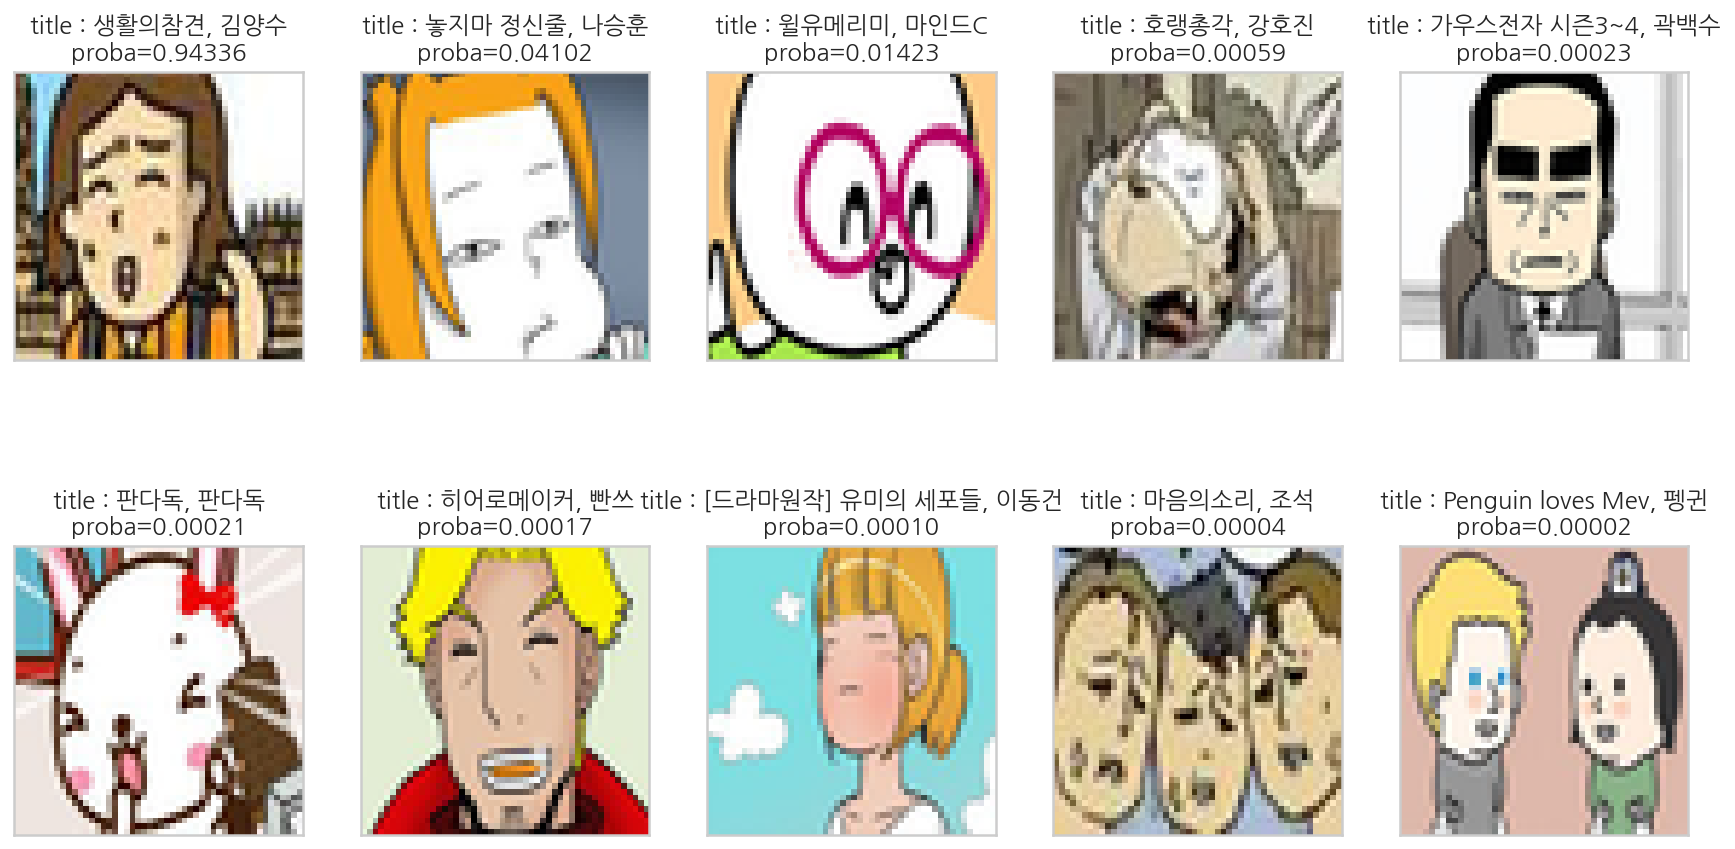

In [49]:
for i in range(0, len(X_test), 70):
    plot_similar_wbt(i, result_df_test, X_test)
    print('=============================================================================================================================')

In [50]:
y_pred2 = y_pred.argmax(axis=1)
y_pred2.shape

(1052,)

In [51]:
y_test.shape

(1052,)

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2, target_names=le.classes_))

              precision    recall  f1-score   support

         강호진       0.63      0.53      0.58        32
         곽백수       0.79      0.93      0.86        74
         국중록       0.62      0.75      0.68        28
         김규삼       0.51      0.54      0.53        35
         김양수       0.91      0.94      0.92        51
         나승훈       0.72      0.81      0.76        52
         마영성       0.62      0.82      0.71        34
        마인드C       0.80      0.86      0.83        37
          미티       0.68      0.66      0.67        29
         박경란       1.00      0.92      0.96        26
         박바퀴       0.96      1.00      0.98        44
         박용제       0.62      0.54      0.58        28
         브림스       0.79      0.60      0.68        25
          빤쓰       0.57      0.50      0.53        34
      스튜디오 문       0.90      0.68      0.78        28
        아이리더       0.84      0.79      0.82       106
         양영순       0.91      0.80      0.85        64
         이광수       0.64    

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred2)

In [54]:
cm_df = pd.DataFrame(data=cm, columns=le.classes_, index=le.classes_)

In [55]:
accs = []
for i, row in cm_df.iterrows():
    accs.append(row[i] / row.sum())

In [56]:
cm_df['acc'] = accs

In [57]:
cm_df.sort_values(by='acc')

강호진  곽백수  국중록  김규삼  김양수  나승훈  마영성  마인드C  미티  박경란  박바퀴  박용제  브림스  빤쓰  스튜디오 문  아이리더  양영순  이광수  이동건  조석  최병열  최훈  탐이부  판다독  펭귄       acc
빤쓰        1    0    0    2    1    0    1     1   1    0    0    1    0  17       0     0    0    0    0   4    0   5    0    0   0  0.500000
강호진      17    4    2    0    0    3    0     0   0    0    0    0    0   1       0     1    0    0    0   3    0   0    1    0   0  0.531250
박용제       0    0    0    1    0    0    1     0   1    0    0   15    1   3       0     2    0    0    2   0    0   1    1    0   0  0.535714
김규삼       1    3    1   19    0    2    0     0   0    0    0    1    1   1       0     1    1    3    0   0    1   0    0    0   0  0.542857
탐이부       0    1    2    2    0    5    0     1   0    0    0    2    0   1       0     0    2    0    2   0    0   0   25    0   0  0.581395
브림스       1    0    0    1    0    0    0     0   0    0    0    0   15   0       0     5    0    2    0   0    0   0    0    1   0  0.600000
이광수       1    0    3    3    0    0    1     0   2    0    0    0    0   0       1     0    0   18    0   0    0   0    0    0   0  0.620690
미티        0    0    1    1    0    0    1     0  19    0    0    0    0   0       0     1    2    2    0   1    0   1    0    0   0  0.655172
스튜디오 문    0    0    1    0    0    0    0     0   0    0    0    0    1   2      19     4    0    0    0   0    0   0    1    0   0  0.678571
이동건       0    0    0    0    2    0    1     0   0    0    0    0    1   0       0     0    0    1   25   1    1   1    1    1   0  0.714286
국중록       0    1   21    1    1    1    0     1   0    0    0    0    0   1       0     1    0    0    0   0    0   0    0    0   0  0.750000
아이리더      0    0    1    0    1    0    8     0   3    0    0    2    0   1       1    84    0    1    1   1    0   0    2    0   0  0.792453
양영순       3    3    0    0    0    2    0     1   0    0    0    0    0   1       0     0   51    0    0   1    0   2    0    0   0  0.796875
조석        1    1    2    5    0    1    1     1   2    0    0    0    0   0       0     0    0    0    0  63    0   2    0    0   0  0.797468
나승훈       0    3    0    0    0   42    0     3   0    0    0    0    0   0       0     0    0    0    0   0    0   0    4    0   0  0.807692
마영성       1    0    0    2    0    0   28     0   0    0    0    3    0   0       0     0    0    0    0   0    0   0    0    0   0  0.823529
마인드C      0    0    0    0    0    1    1    32   0    0    0    0    0   0       0     0    0    1    0   0    0   0    2    0   0  0.864865
최훈        0    1    0    0    0    0    0     0   0    0    0    0    0   0       0     0    0    0    0   1    0  28    1    0   0  0.903226
박경란       0    0    0    0    0    0    1     0   0   24    0    0    0   0       0     1    0    0    0   0    0   0    0    0   0  0.923077
최병열       1    0    0    0    0    0    0     0   0    0    0    0    0   1       0     0    0    0    0   0   26   0    0    0   0  0.928571
곽백수       0   69    0    0    0    1    0     0   0    0    2    0    0   0       0     0    0    0    0   1    0   1    0    0   0  0.932432
김양수       0    1    0    0   48    0    0     0   0    0    0    0    0   1       0     0    0    0    0   0    1   0    0    0   0  0.941176
판다독       0    0    0    0    0    0    1     0   0    0    0    0    0   0       0     0    0    0    0   0    0   0    0   42   0  0.976744
박바퀴       0    0    0    0    0    0    0     0   0    0   44    0    0   0       0     0    0    0    0   0    0   0    0    0   0  1.000000
펭귄        0    0    0    0    0    0    0     0   0    0    0    0    0   0       0     0    0    0    0   0    0   0    0    0  37  1.000000

In [58]:
# 트레이닝에도 없고 테스트에도 없는 웹툰 썸네일 이미지 갖고와서 predict해보기

test_path = './data/test/'
v_dir_ls, v_img_file, v_list = getImageFromPath(test_path)

All image path listing complete!


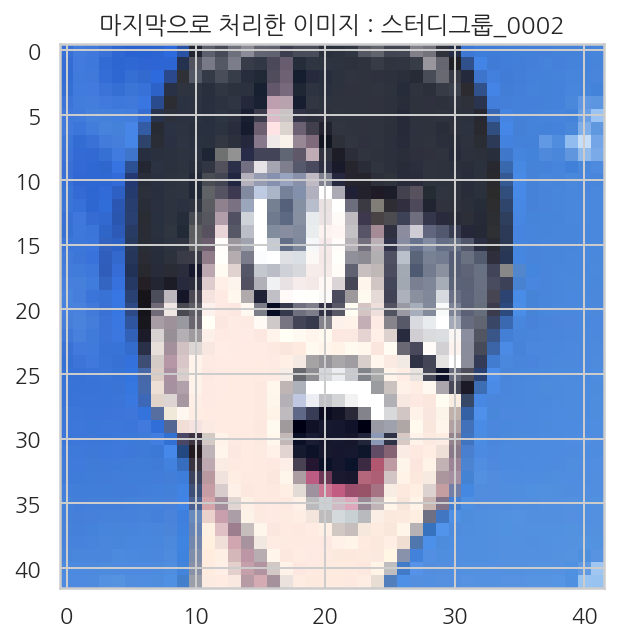

image processing complete! 42 * 42 --
마지막으로 처리한 이미지
(18, 42, 42, 3) float32


In [60]:
V_raw = imageToNpArray(v_dir_ls, 42, 42, "RGB")       # 이미지 path 리스트, 가로px, 세로px, 이미지 모드

In [61]:
y_pred = loaded_model.predict(V_raw, verbose=0)

In [62]:
label_Y = le.inverse_transform(y_test)

In [63]:
result_df_thumb = pd.DataFrame()
result_df_thumb['id'] = v_img_file
result_df_thumb['id'] = result_df_thumb['id'].str.split('.').str[0] + ', ' + v_list
result_df_thumb = pd.concat([result_df_thumb, pd.DataFrame(y_pred)],axis=1)
clear_output()
y_pred.shape
print('id목록\n', result_df_thumb.id.unique())

(18, 25)

id목록
 ['혀로 만난 사이_0006, 집손이' '혀로 만난 사이_0002, 집손이' '나이트런, 김성민' '노곤하개, 홍끼'
 '5kg을위하여, 홍끼' '신도림, 오세형' '덴큐_0001, 백감독' '덴큐_0002, 백감독' '프리드로우, 전선욱'
 '은주의방23부, 노란구미' '은주의방, 노란구미' '위아더능력자, 손하기' '열렙전사, 김세훈' '노네임드NoNameD, 문지현'
 '연애혁명, 232' '신의탑, SIU' '스터디그룹_0003, 유승연' '스터디그룹_0002, 유승연']


In [64]:
result_df_thumb

id             0             1             2             3             4         5             6             7             8             9            10            11            12            13            14            15            16            17            18            19            20            21            22            23            24
0   혀로 만난 사이_0006, 집손이  5.304530e-01  1.521843e-04  1.286267e-02  1.068014e-02  9.694242e-04  0.000751  8.599343e-07  2.189728e-05  7.828873e-03  6.943670e-06  3.217301e-11  5.268221e-03  1.151758e-04  3.937605e-01  4.745689e-05  3.978625e-04  1.706004e-02  3.690435e-03  1.053150e-04  1.995475e-03  5.366285e-05  1.273131e-02  1.677222e-04  8.739621e-04  5.449047e-06
1   혀로 만난 사이_0002, 집손이  6.927910e-01  7.242044e-04  5.010506e-05  5.644704e-06  1.833541e-04  0.000092  7.862708e-08  1.143554e-07  1.314633e-05  1.611539e-06  3.513768e-12  5.773007e-06  1.406464e-06  3.036207e-01  2.413194e-08  3.008860e-07  1.028297e-03  3.942377e-05  1.409260e-05  1.251971e-03  1.330159e-04  6.010404e-07  2.027051e-05  2.943279e-06  1.962896e-05
2            나이트런, 김성민  9.471292e-03  3.781759e-05  3.464816e-02  1.229679e-03  8.520170e-05  0.000673  2.873050e-04  4.958077e-04  1.429876e-02  8.787295e-05  1.376862e-06  2.555262e-03  8.123995e-03  1.061669e-04  7.724432e-03  7.890813e-01  4.573719e-03  1.128328e-01  3.140933e-04  3.728869e-04  1.643547e-04  8.322786e-05  1.159972e-02  7.444173e-05  1.077151e-03
3             노곤하개, 홍끼  1.560882e-11  2.995093e-10  6.751154e-07  3.830760e-10  5.055358e-11  0.996076  2.206123e-10  1.566226e-04  1.796232e-14  8.464527e-16  6.159937e-12  9.611005e-10  2.481650e-11  3.891821e-10  5.838235e-15  2.640236e-08  2.414521e-09  9.025980e-11  8.499470e-09  1.508362e-10  5.913928e-16  5.181024e-13  3.766032e-03  5.535935e-07  3.349122e-10
4          5kg을위하여, 홍끼  5.946326e-01  1.904415e-03  2.771557e-02  7.646933e-03  1.224674e-02  0.183907  4.634042e-03  7.216334e-03  6.075454e-03  1.525182e-03  1.313026e-05  1.373293e-02  1.636687e-02  3.828518e-03  6.723536e-05  2.749969e-02  5.900687e-03  7.093345e-03  1.686746e-03  4.217061e-03  1.790460e-03  1.766620e-03  1.661121e-02  4.914061e-02  2.780712e-03
5             신도림, 오세형  7.146609e-01  1.381348e-04  2.765442e-03  2.505136e-03  1.111376e-03  0.002767  1.453675e-03  6.416497e-03  9.094134e-03  8.155160e-04  5.315280e-07  2.860962e-03  1.925897e-02  2.405713e-03  2.910410e-05  8.553146e-03  3.641469e-02  6.119107e-04  1.435735e-03  1.744269e-01  7.666314e-05  2.548458e-04  1.087376e-02  9.054407e-04  1.636597e-04
6         덴큐_0001, 백감독  4.782246e-05  2.111145e-04  6.776722e-07  7.193218e-06  2.482884e-04  0.000020  5.460826e-08  6.757716e-05  1.447125e-06  1.281745e-09  3.475687e-10  5.651438e-05  3.483206e-10  4.409380e-04  1.913438e-08  1.254201e-07  9.915321e-01  1.201437e-07  4.085822e-08  5.360785e-04  2.417289e-07  6.800122e-03  9.064447e-06  1.979034e-05  7.162448e-08
7         덴큐_0002, 백감독  2.238849e-04  3.303296e-06  2.560446e-07  4.648489e-06  8.771215e-05  0.000001  1.393066e-08  1.137821e-07  1.390677e-04  1.662808e-11  6.511993e-09  2.565434e-06  7.427187e-10  1.226307e-04  4.203951e-10  4.556077e-09  8.865413e-01  1.145079e-08  1.155921e-08  1.127248e-01  1.000313e-06  1.380736e-04  5.650764e-08  8.873350e-06  1.909982e-07
8           프리드로우, 전선욱  3.173224e-03  4.050441e-05  9.634405e-03  1.600665e-02  2.007967e-03  0.000411  1.718455e-04  1.086179e-04  6.441895e-01  1.166756e-04  1.777497e-08  3.605710e-02  2.574477e-02  3.428285e-02  7.542281e-04  1.745340e-01  1.291299e-03  7.409823e-03  5.647871e-03  2.608543e-02  1.143956e-03  4.206321e-03  6.760141e-03  8.678724e-05  1.349260e-04
9        은주의방23부, 노란구미  2.226416e-05  1.306432e-07  9.996477e-01  5.786437e-11  1.411846e-12  0.000301  1.424183e-07  2.702131e-06  9.394218e-10  9.101411e-12  1.253531e-06  2.172142e-11  9.608760e-07  8.008791e-12  7.367216e-12  9.385000e-07  1.500041e-07  6.034096e-07  2.490596e-11  1.851164e-06  2.236321e-09  2.814796e-11  1.

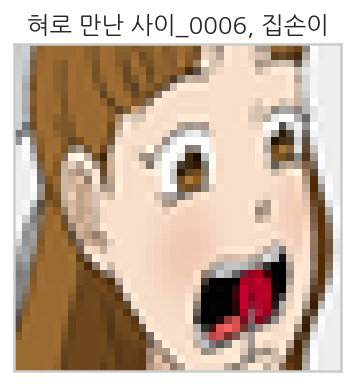

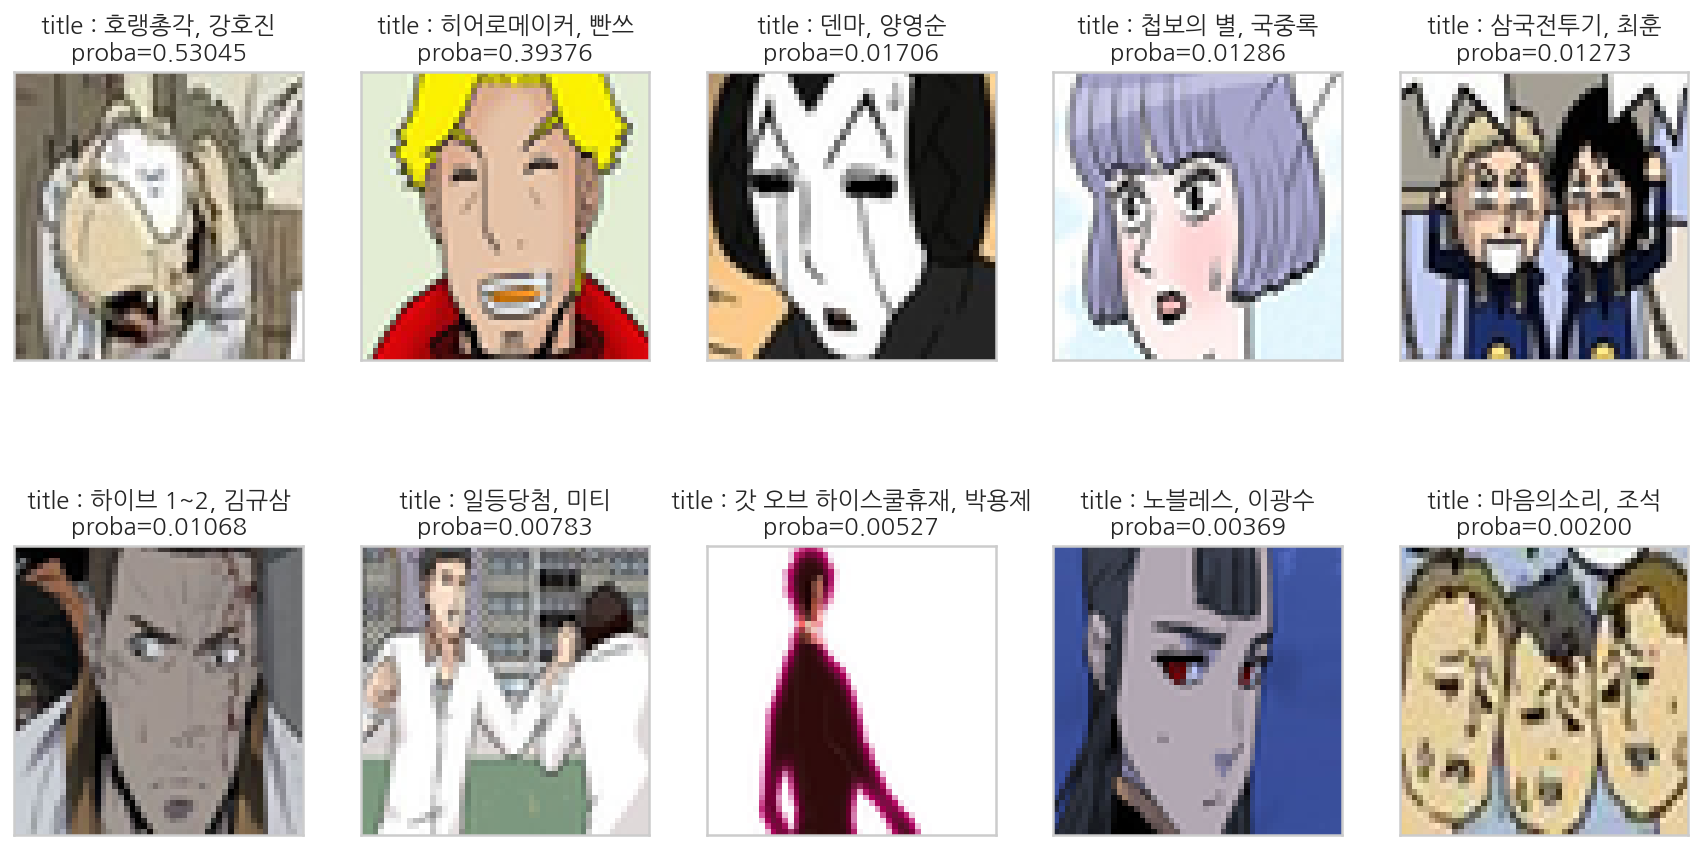

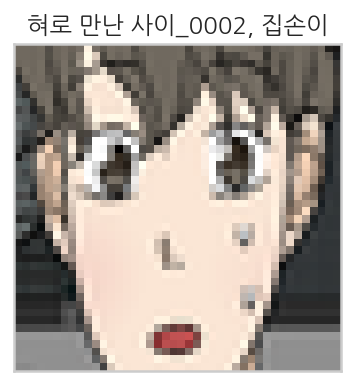

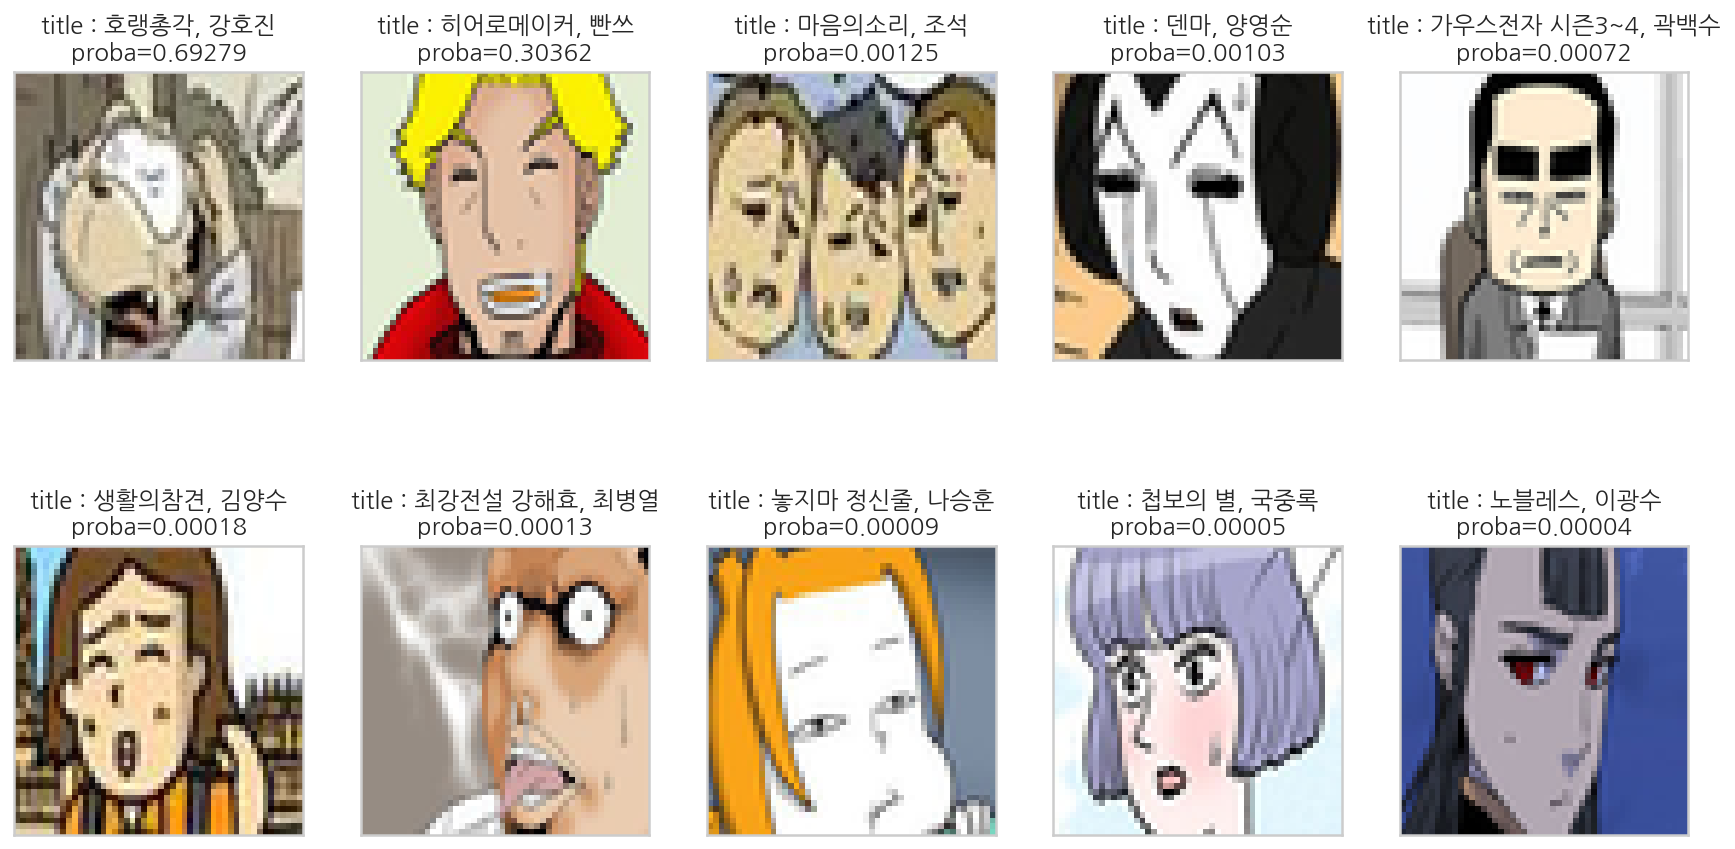

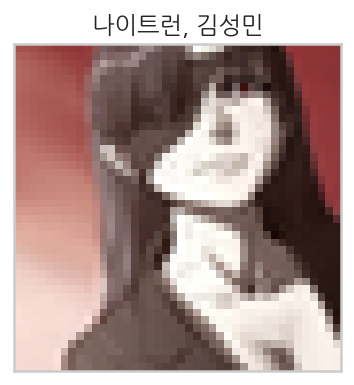

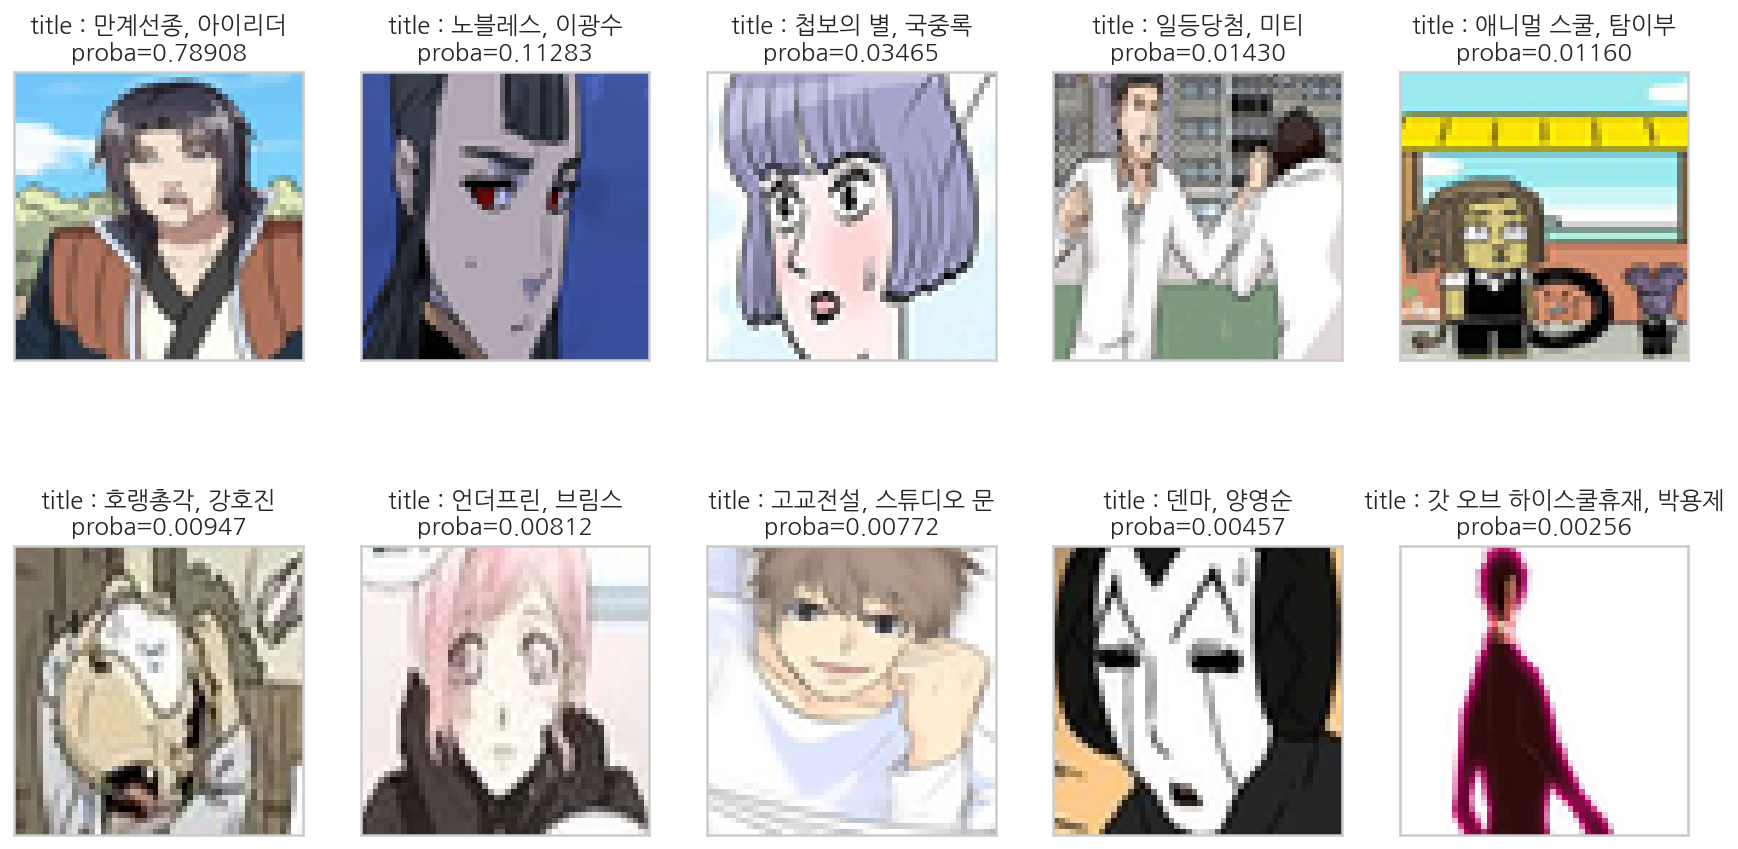

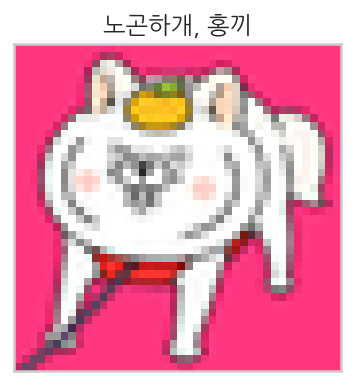

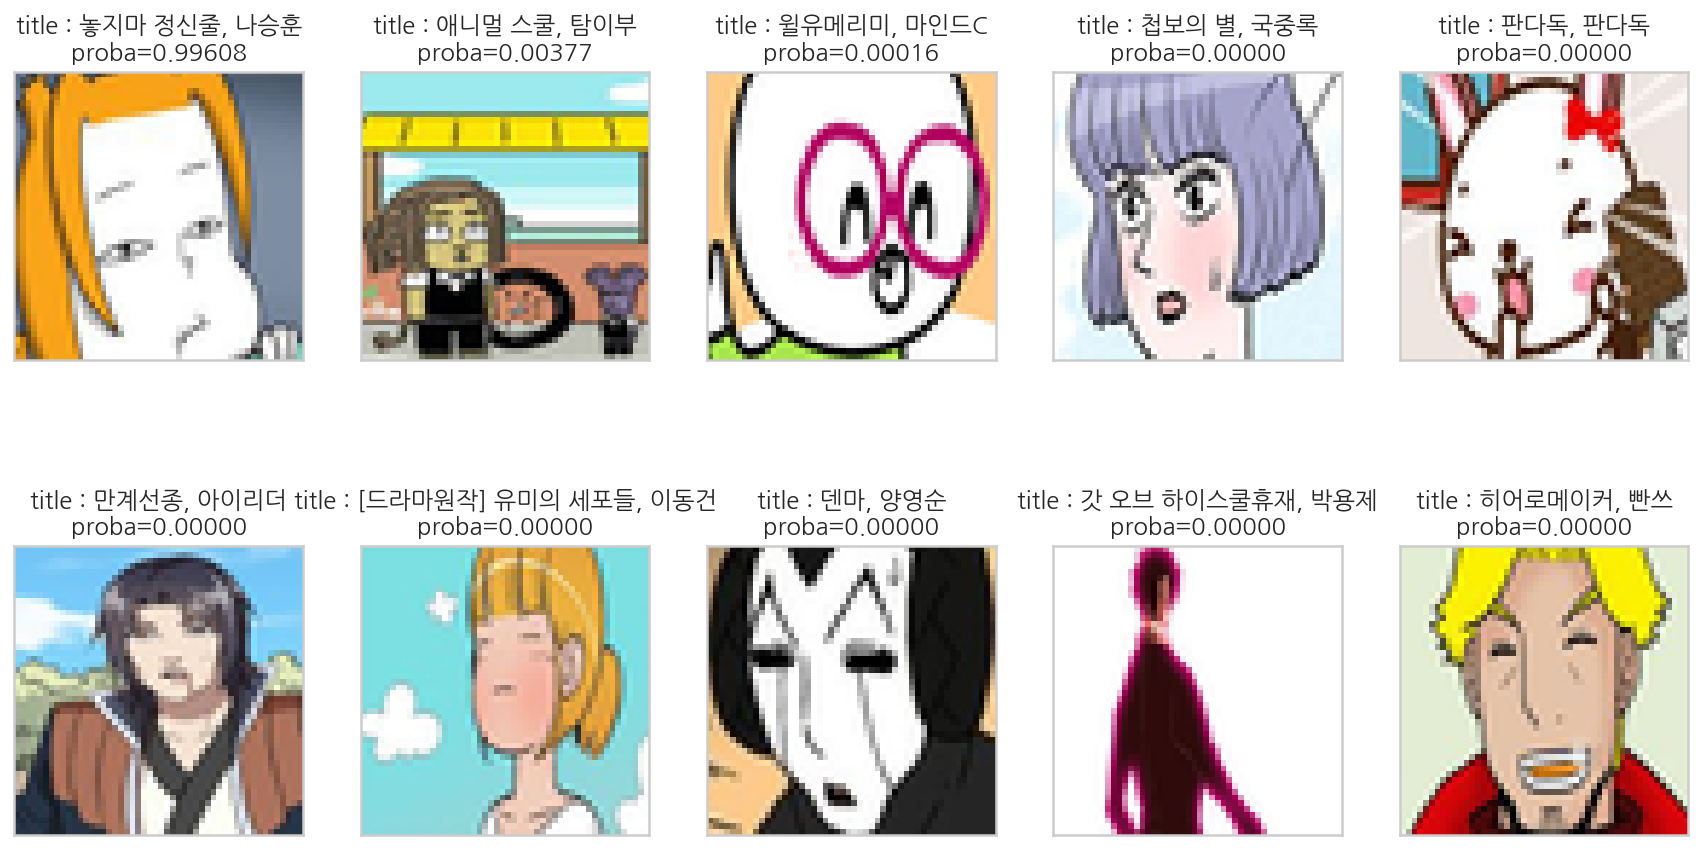

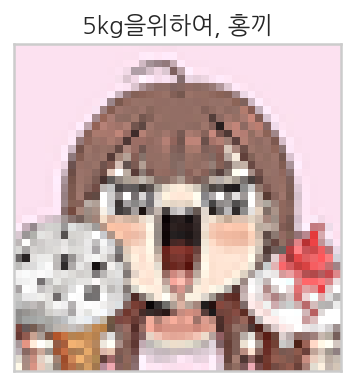

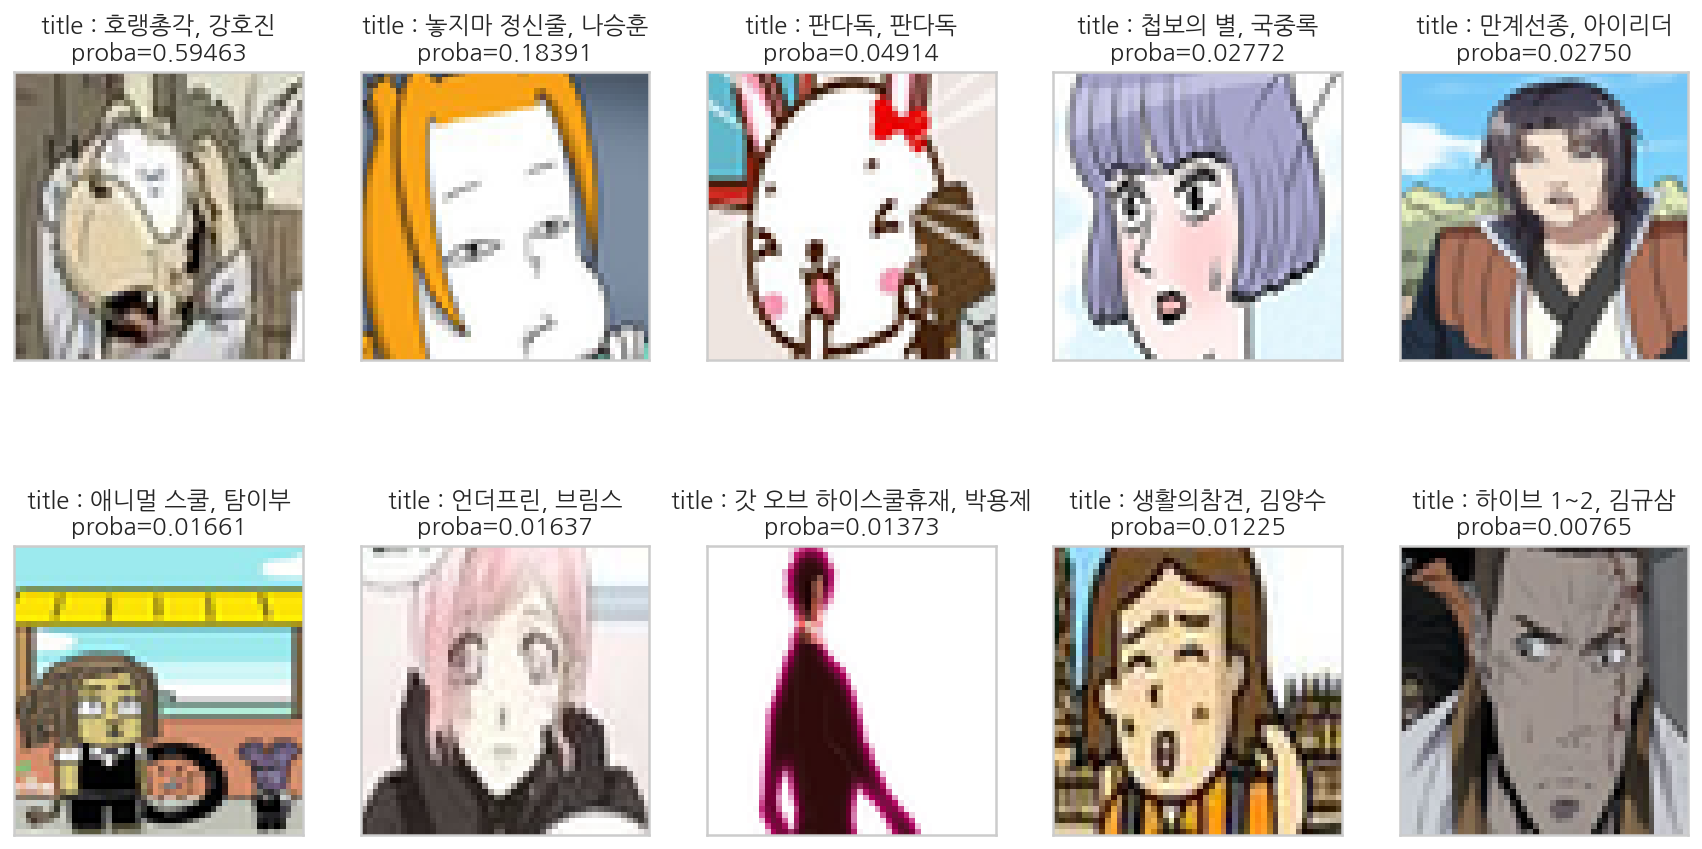

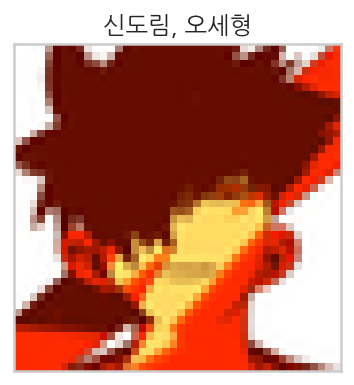

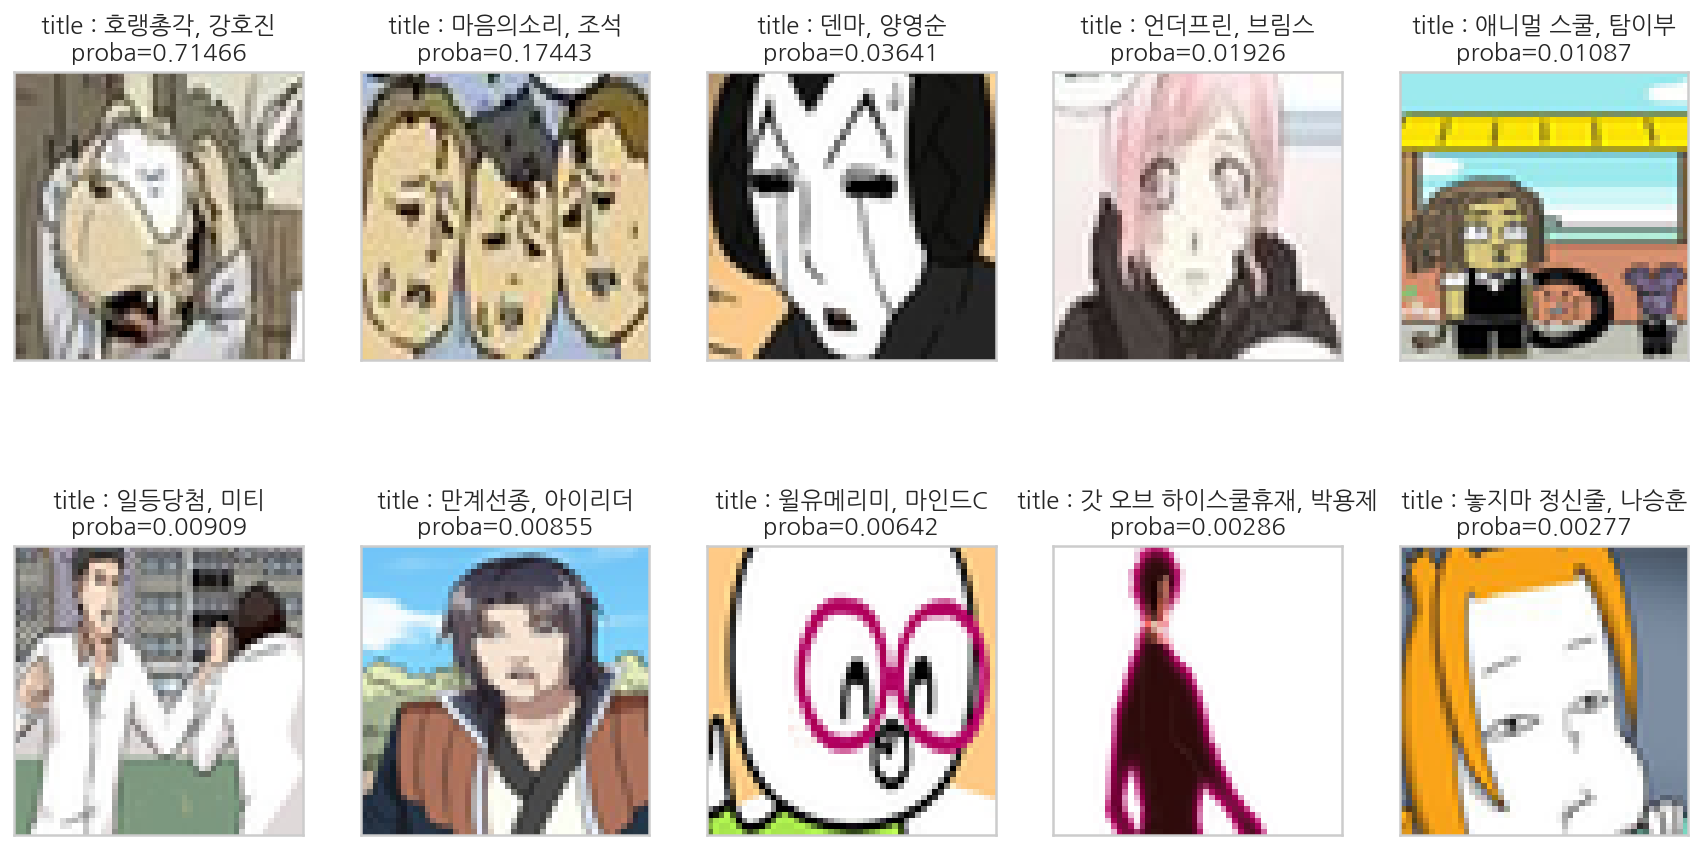

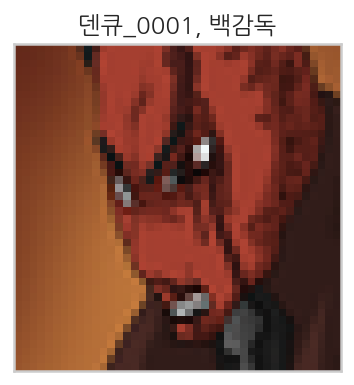

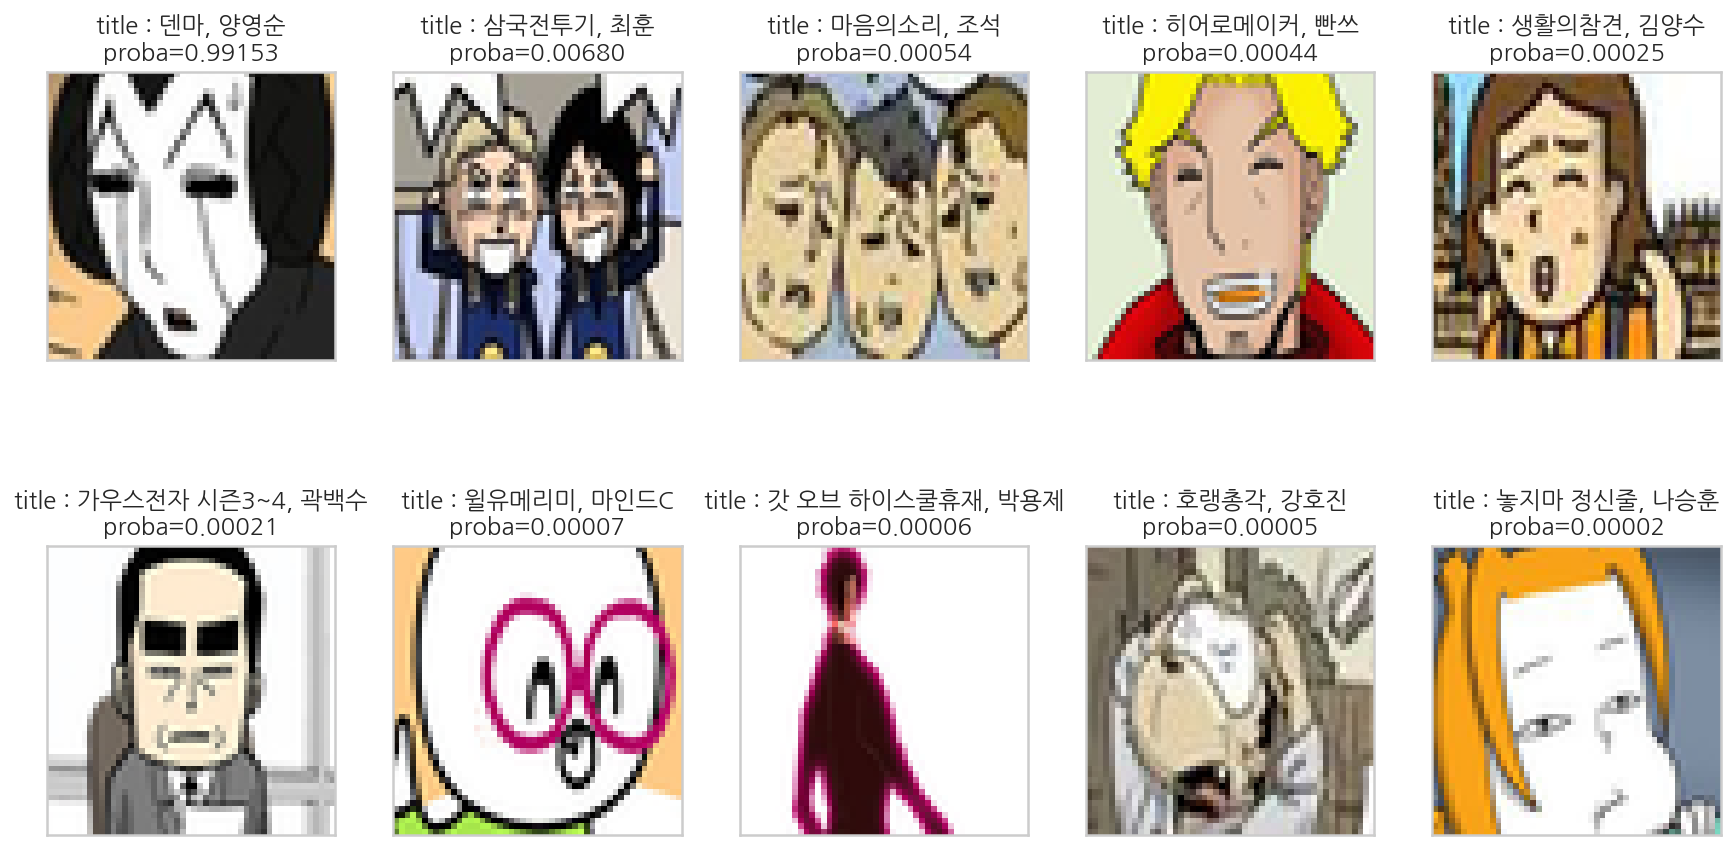

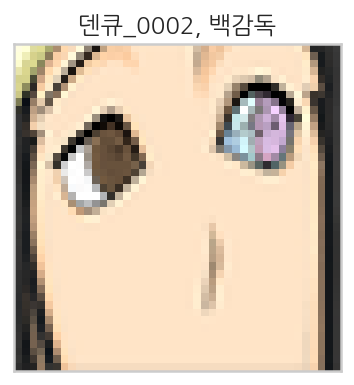

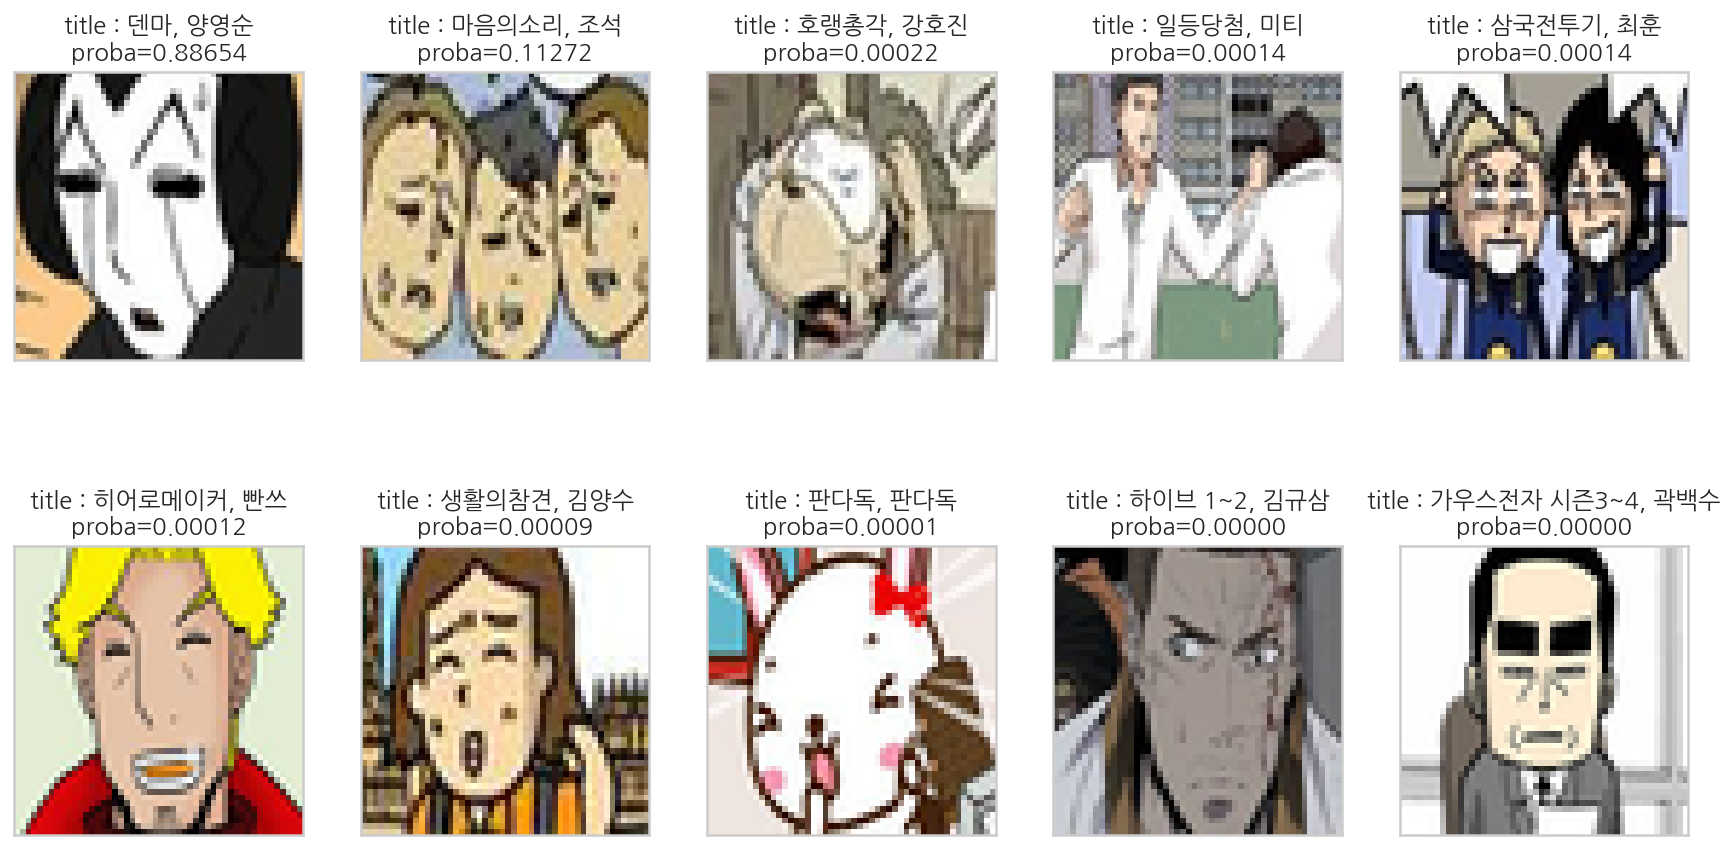

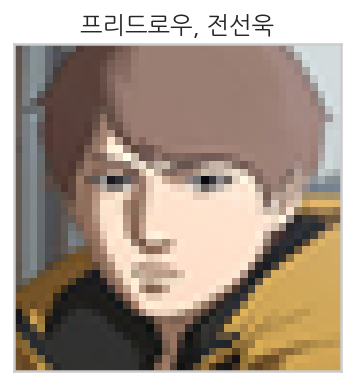

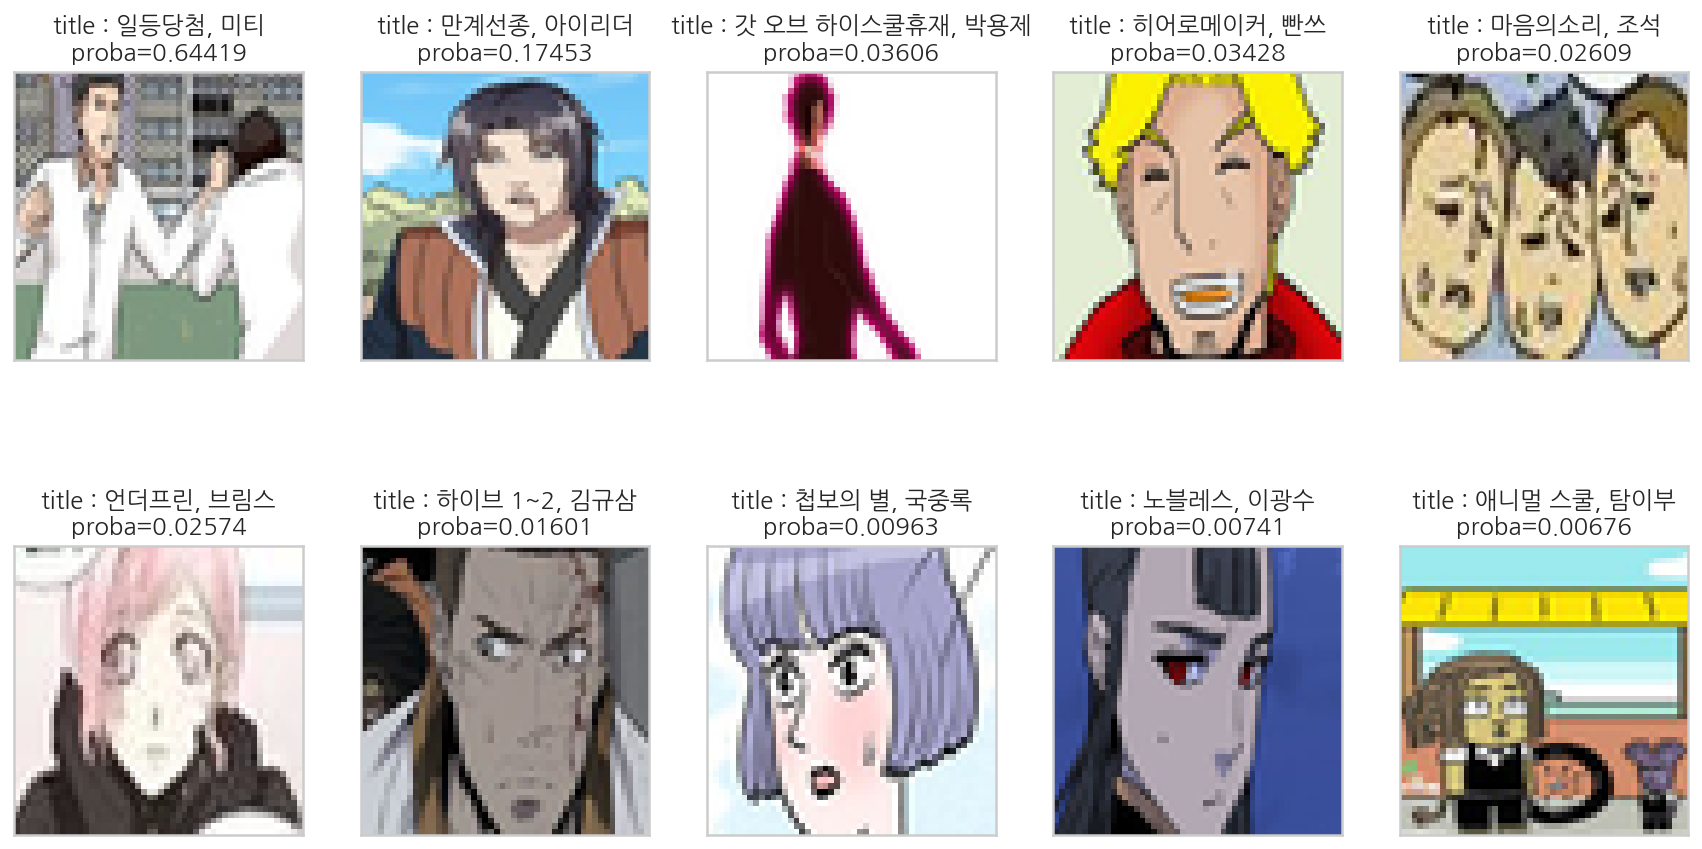

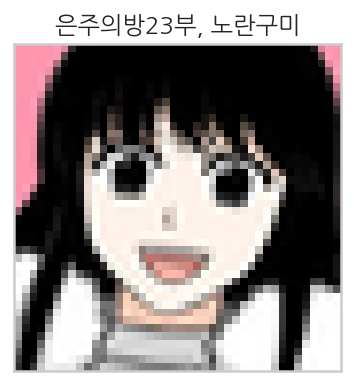

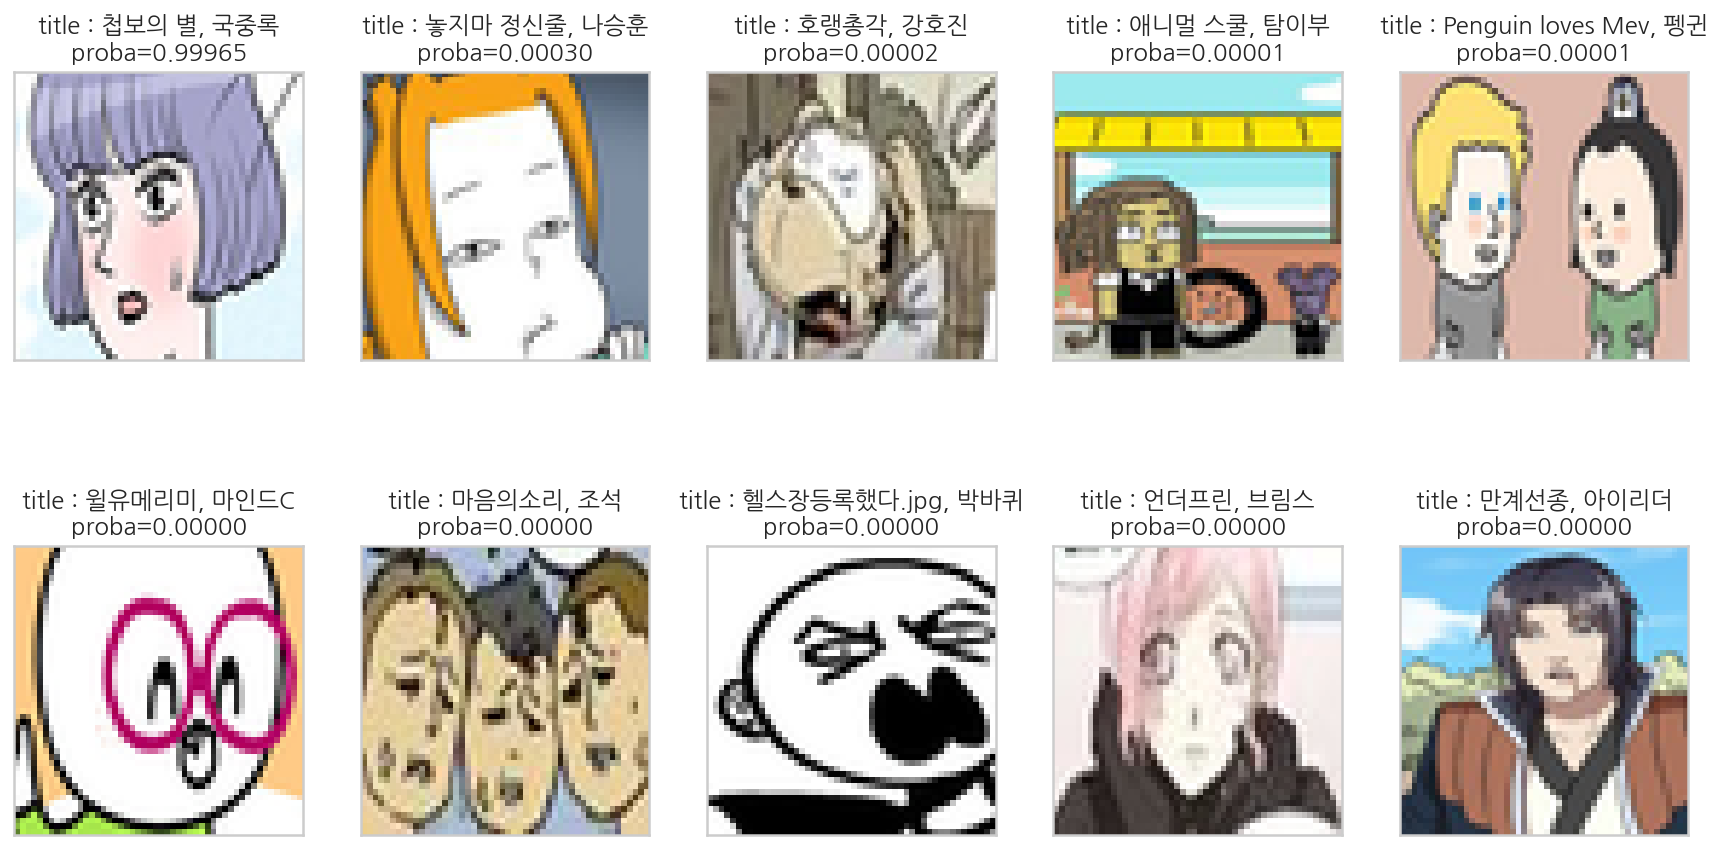

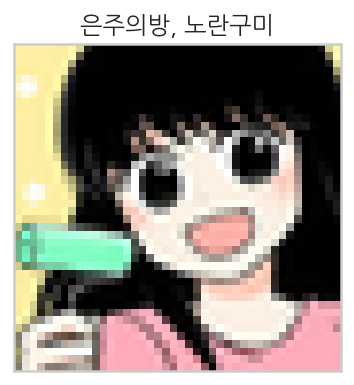

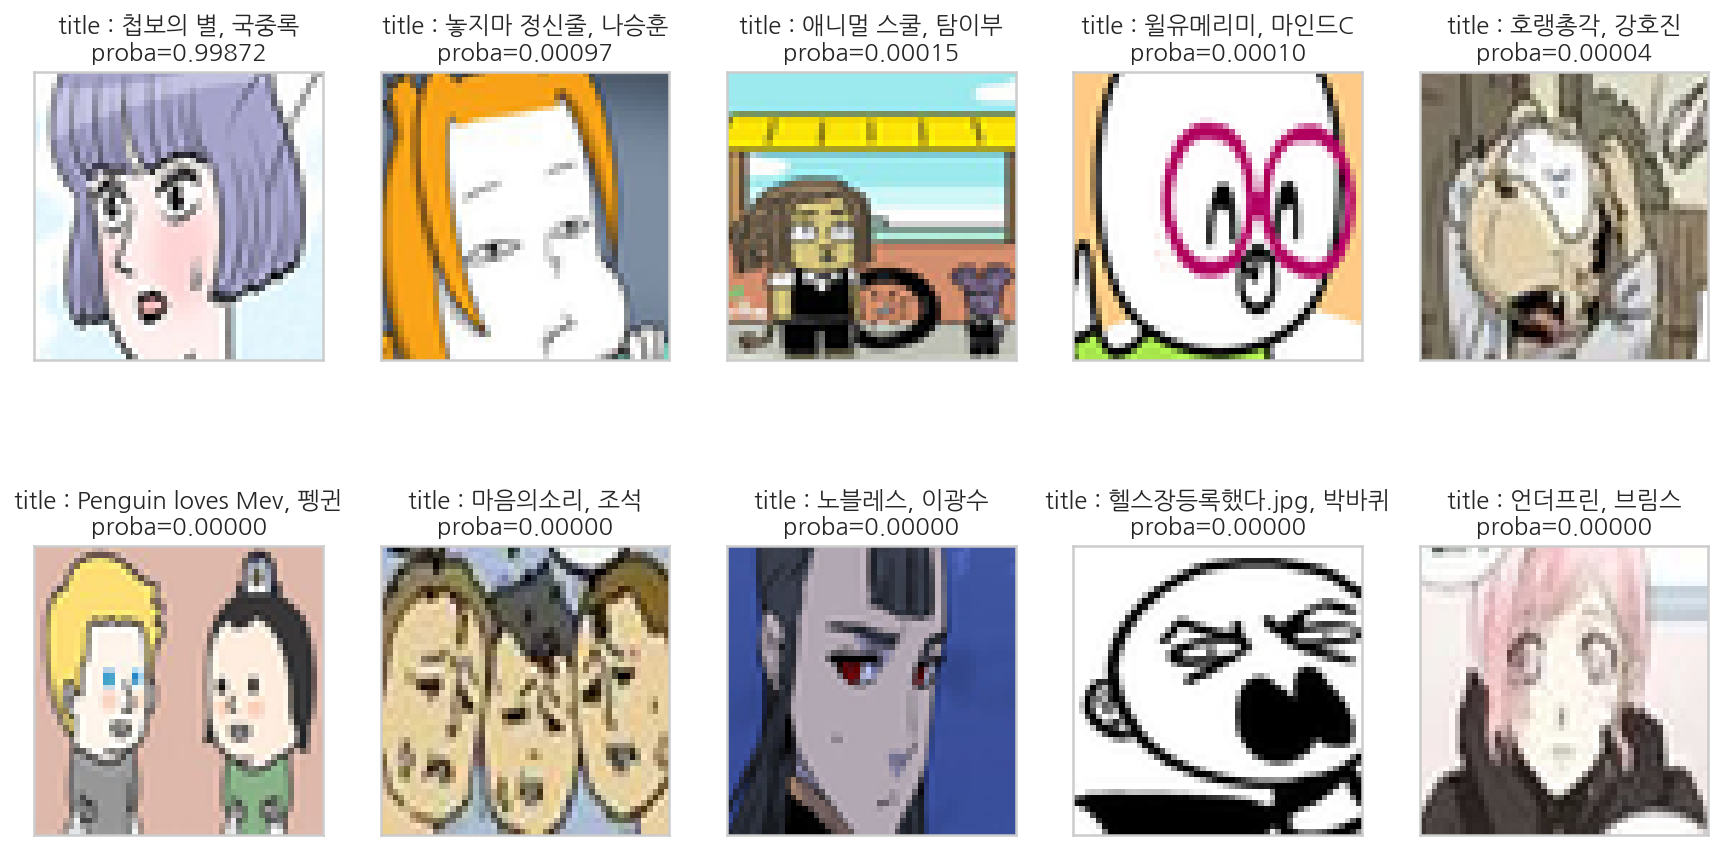

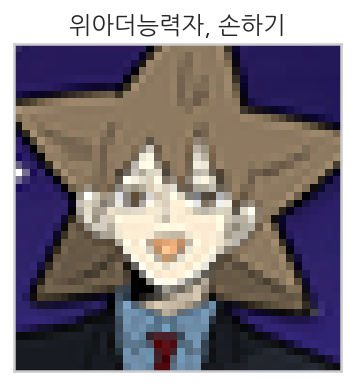

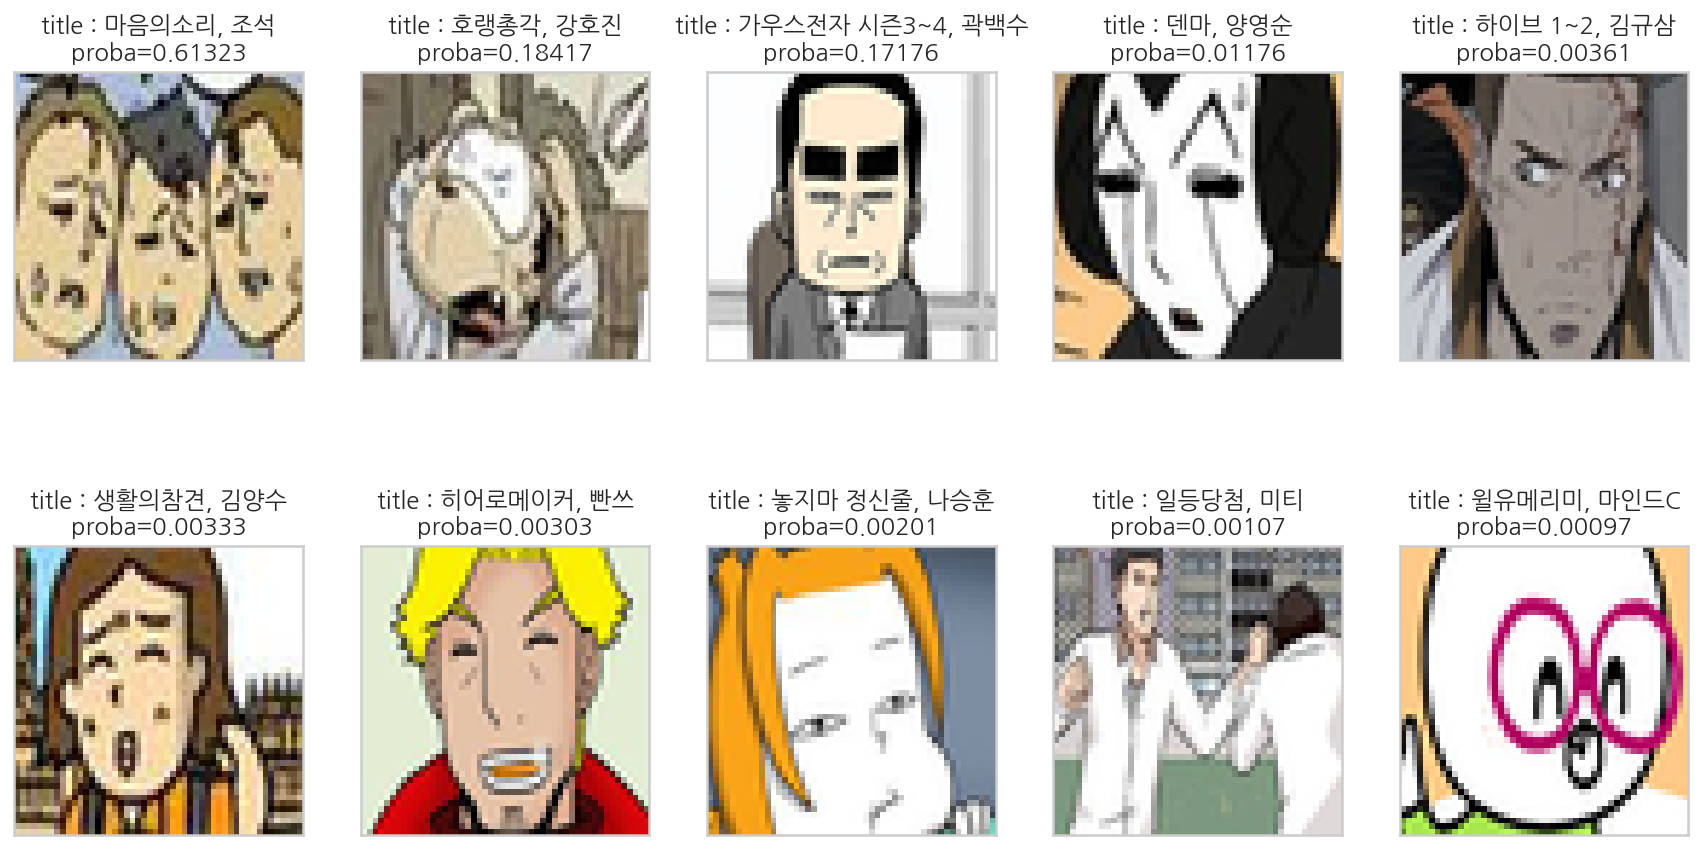

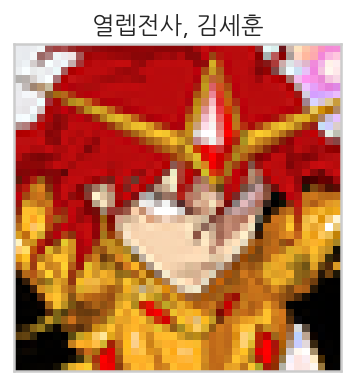

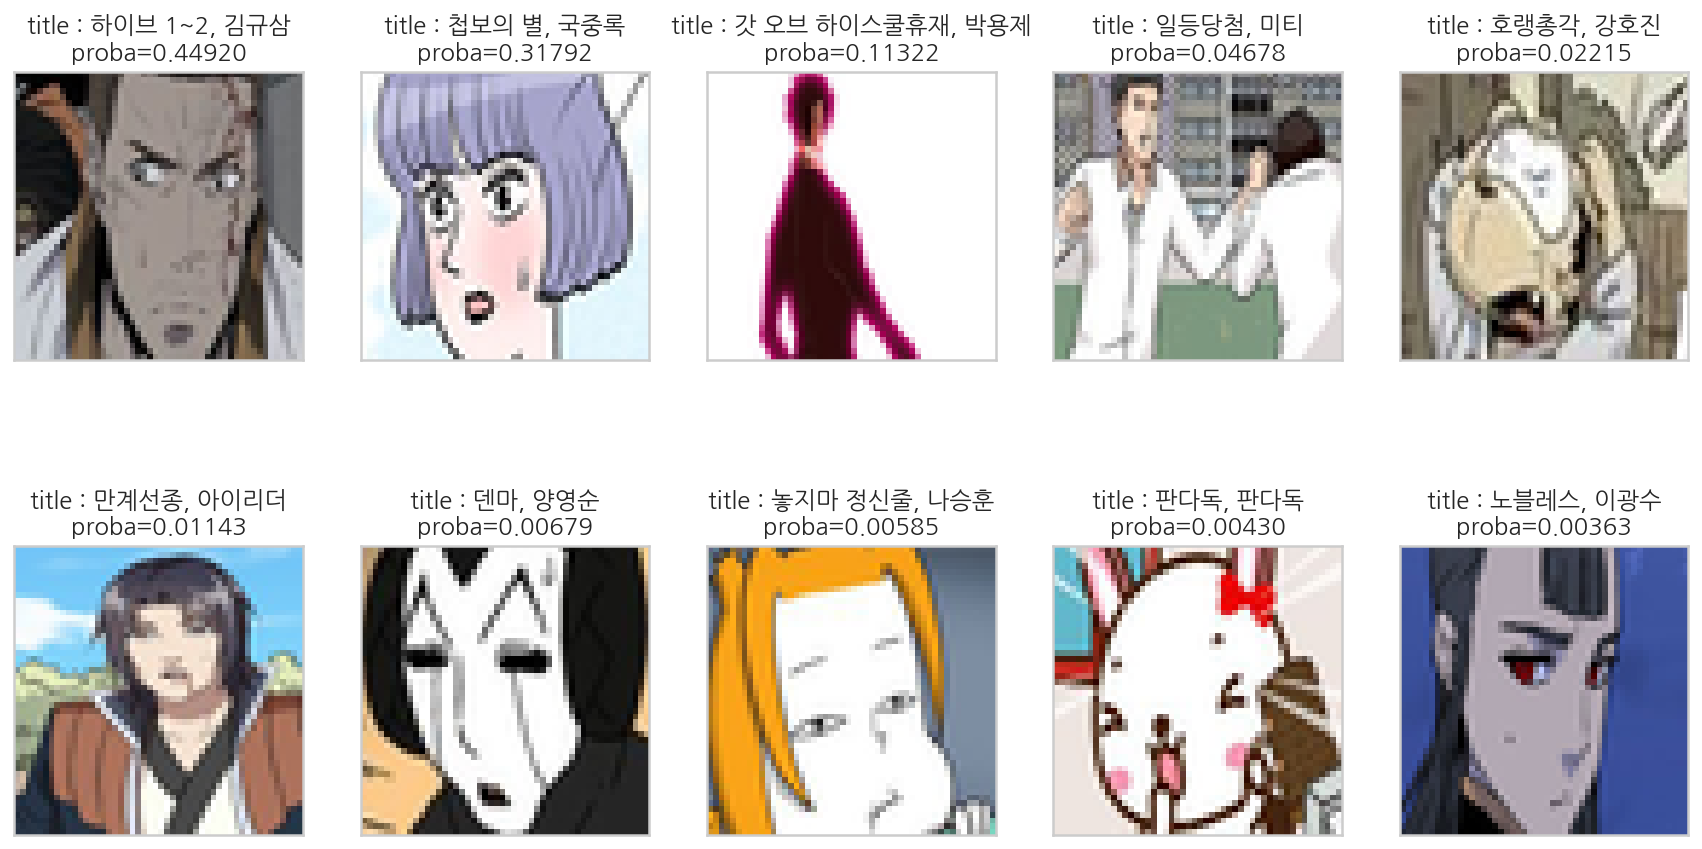

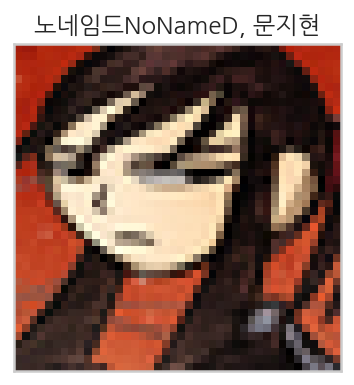

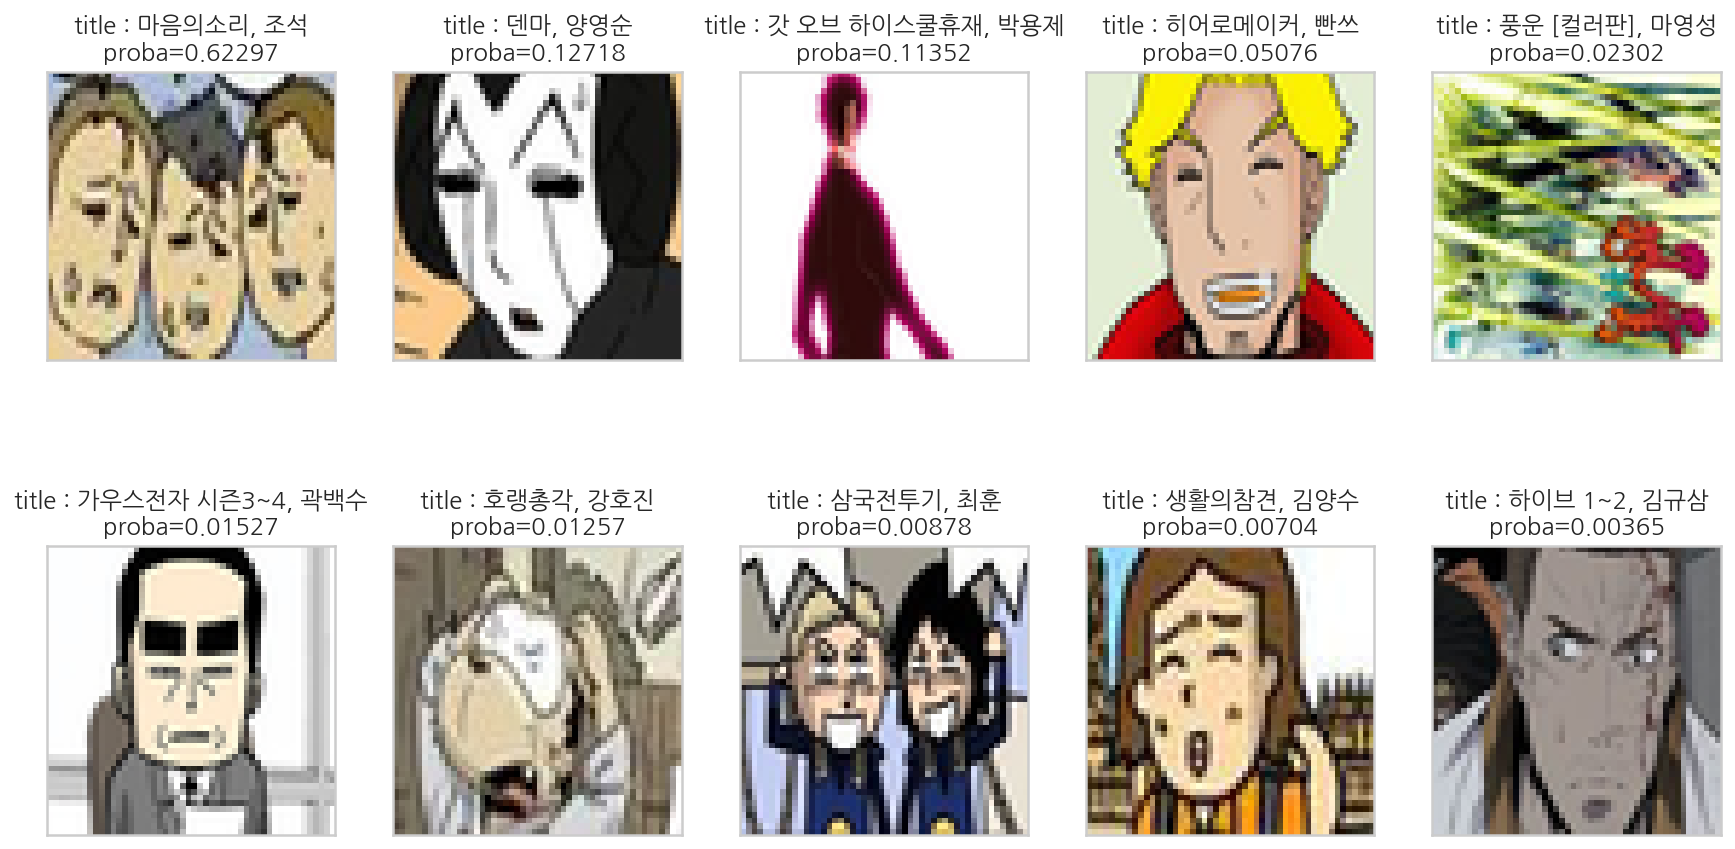

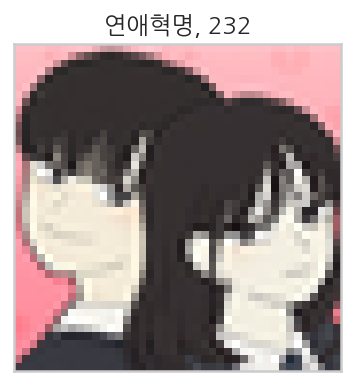

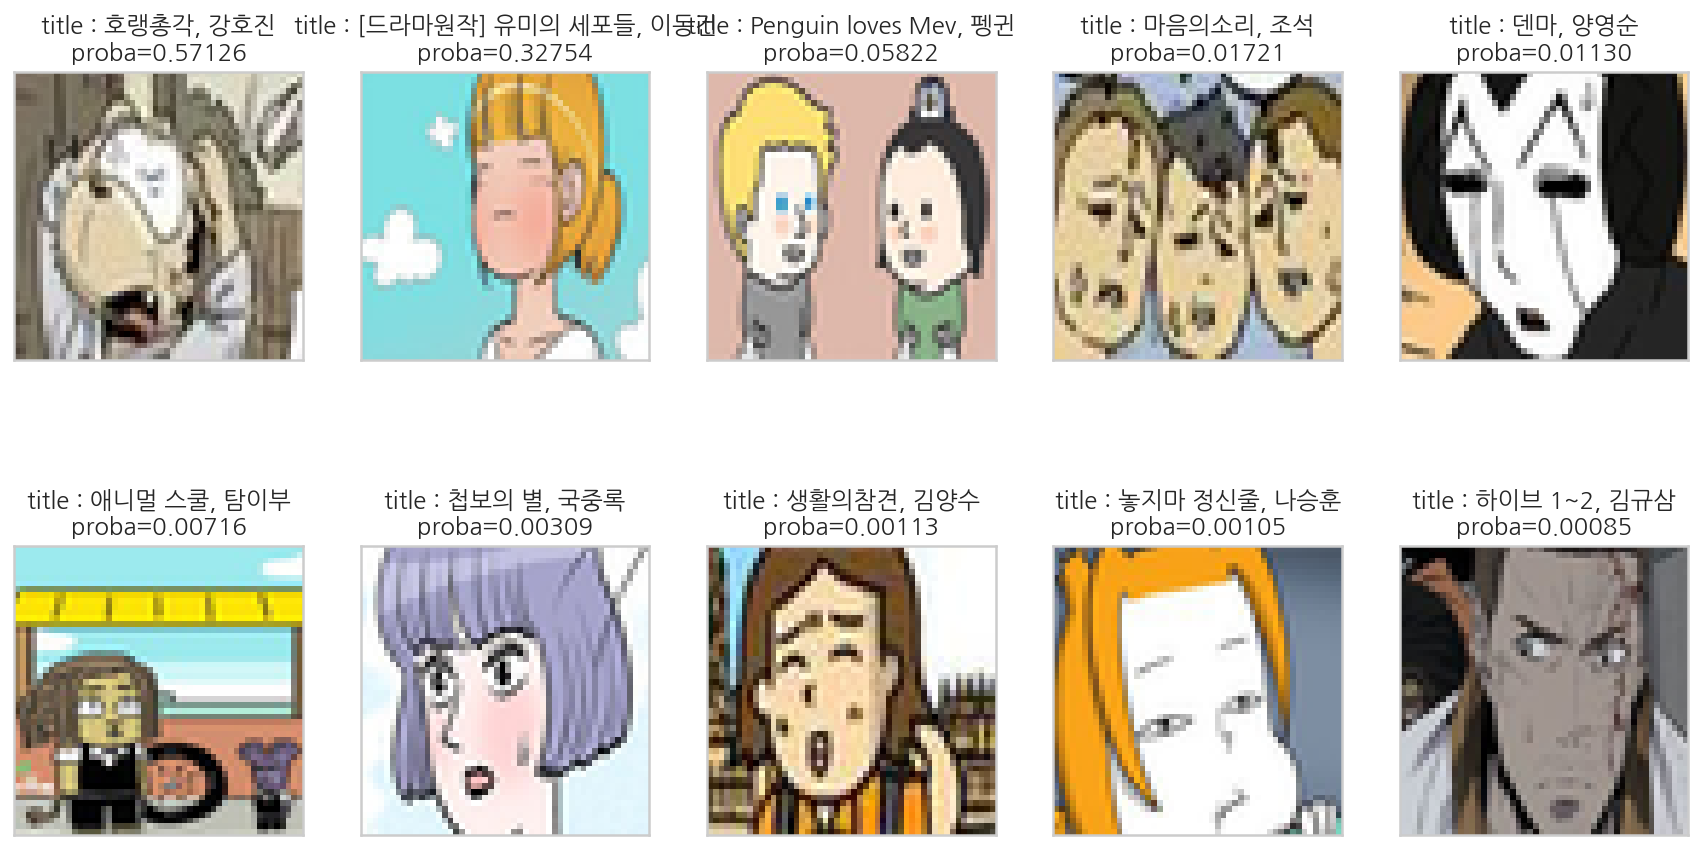

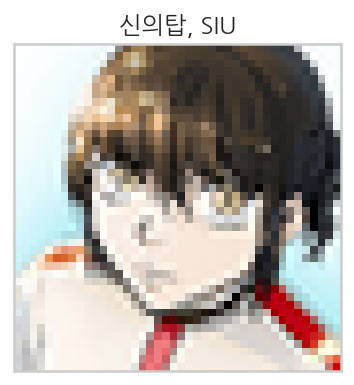

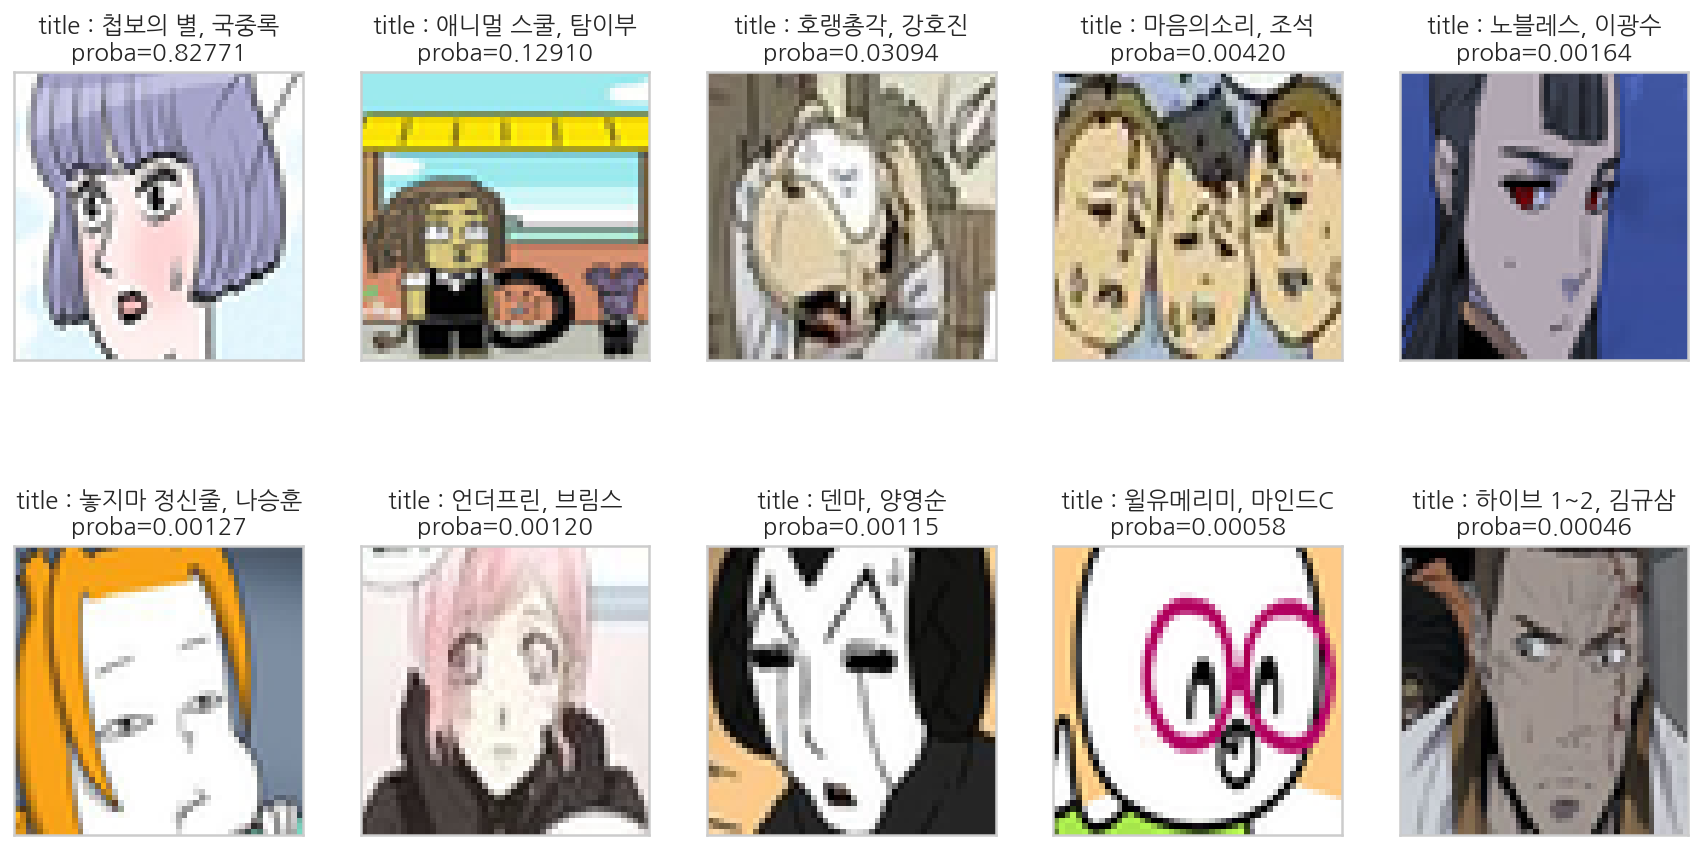

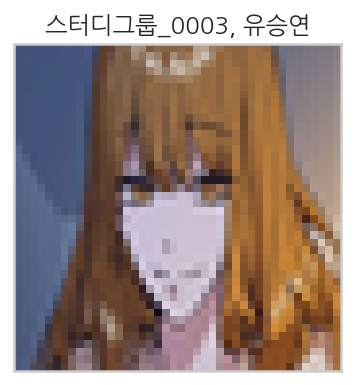

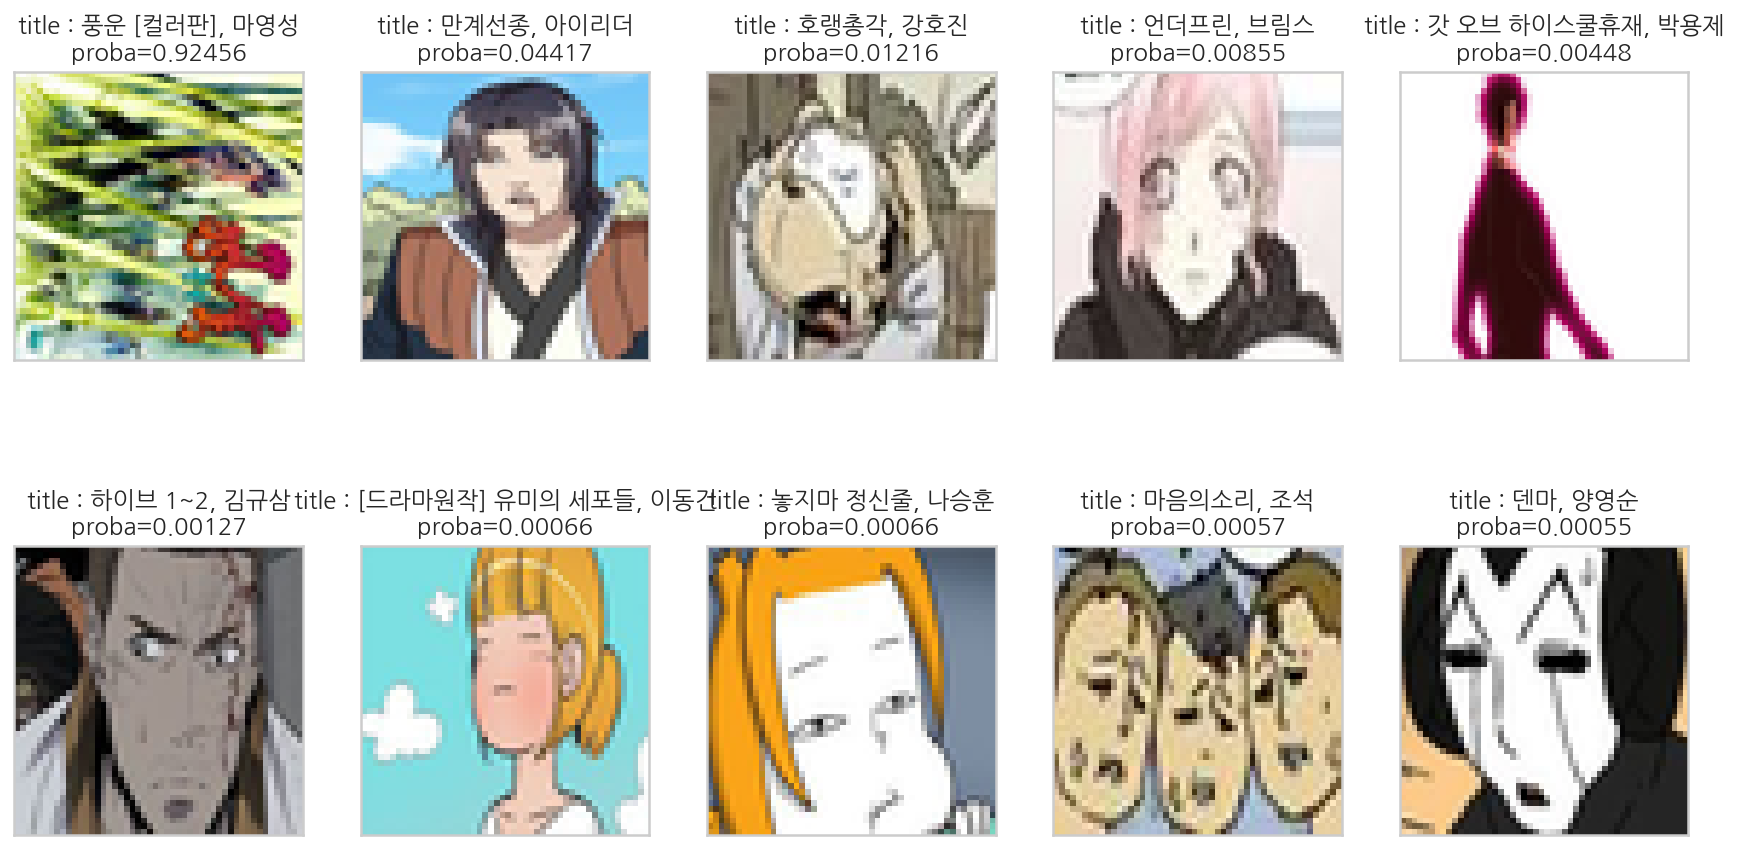

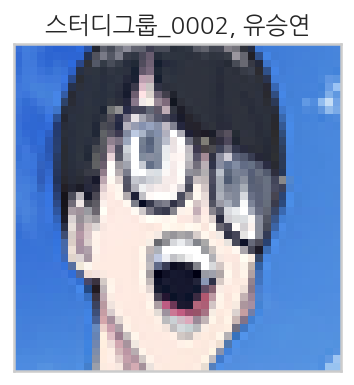

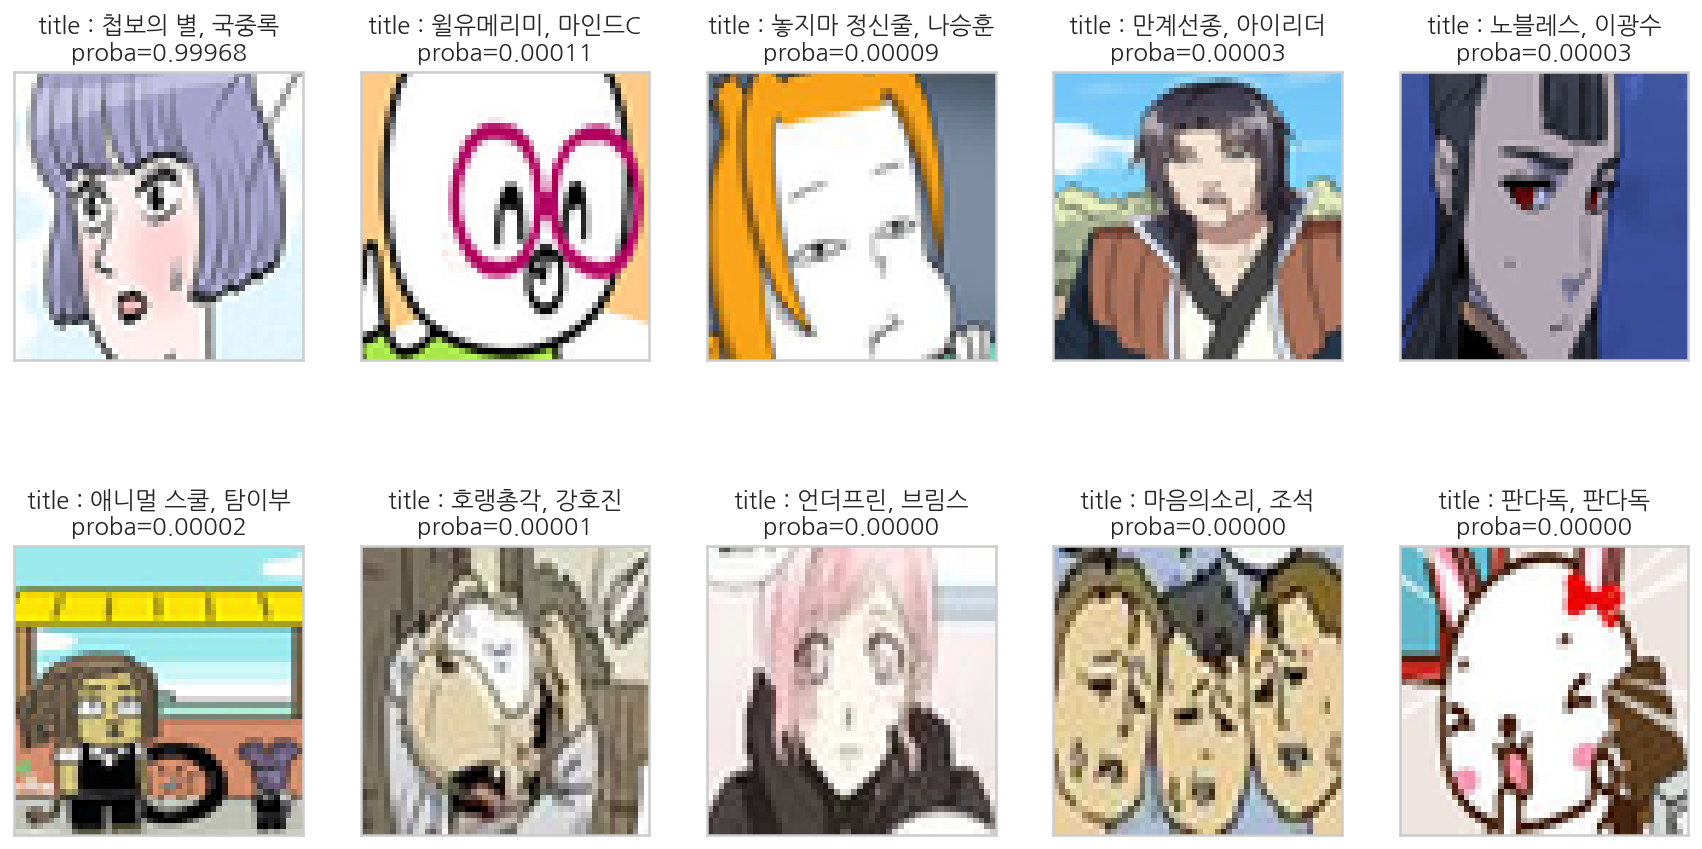

In [65]:
for i in range(len(V_raw)):
    plot_similar_wbt(i, result_df_thumb, V_raw)
    print('=============================================================================================================================')